In [1]:
library(ggplot2)
library(bestglm)
library(VGAM)
library(ellipse)
library(leaps)
library(MASS)
library(corrplot)

ERROR: Error: package or namespace load failed for ‘ggplot2’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘lazyeval’


In [43]:
Y_train <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/Y_train_sl9m6Jh.csv")
X_train <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/X_train_v2.csv")
X_test <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/X_test_v2.csv")
Y_test_random <- read.csv("~/4A/Projet_4A/GestionDeProjet4A/Données/Y_test_random.csv")
WindFarms<- read.table("~/4A/Projet_4A/GestionDeProjet4A/Données/WindFarms_complementary_data.csv", sep=";", quote="\"")

# Premiers tests sur set de train

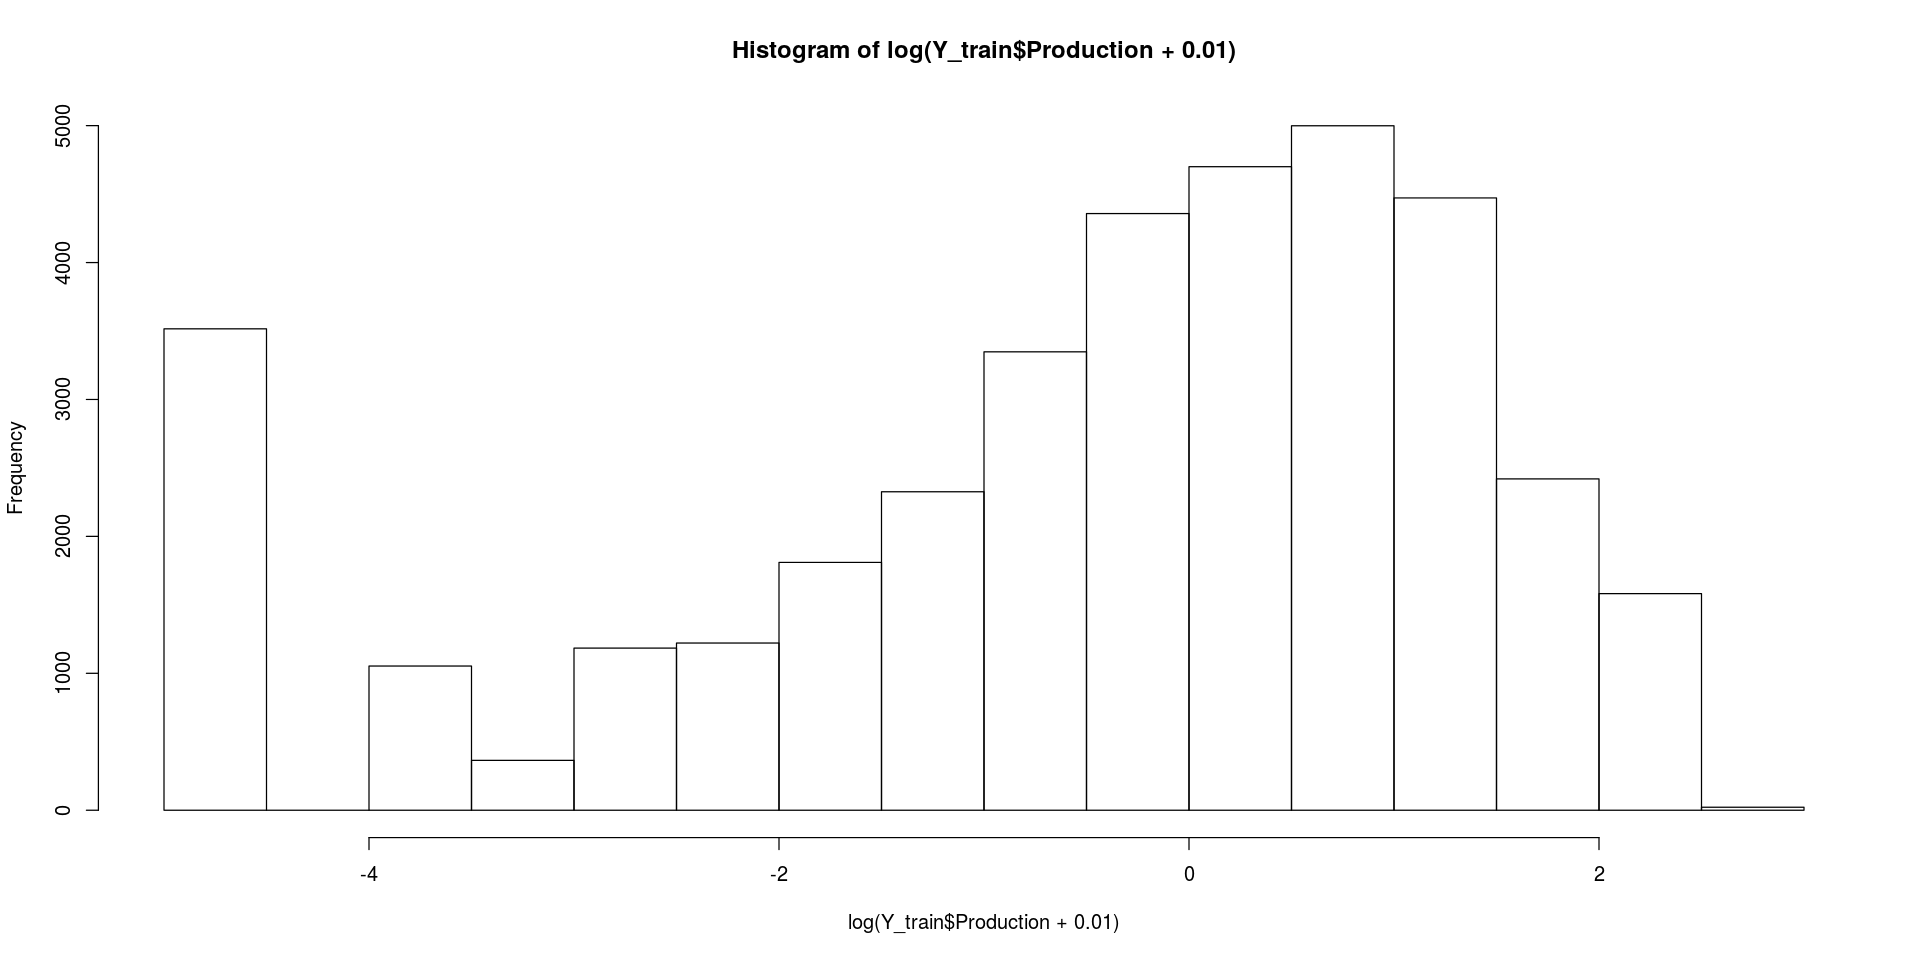

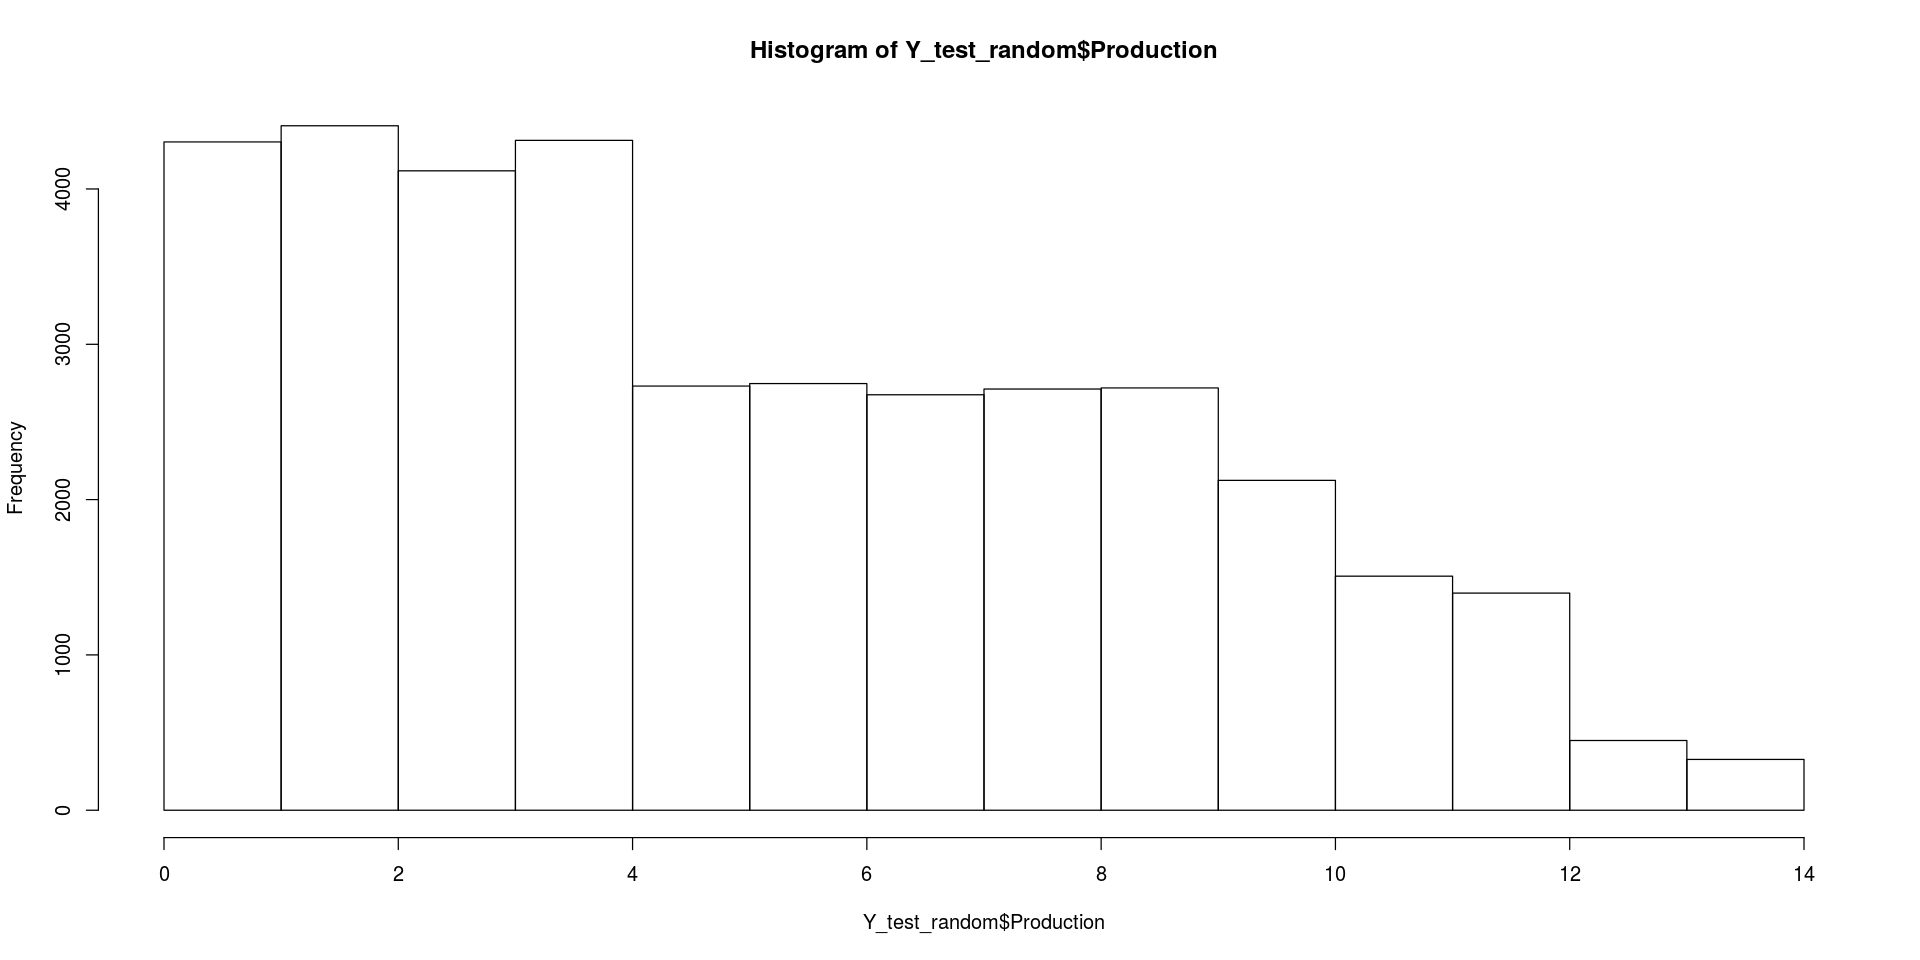

In [44]:
hist(log(Y_train$Production+0.01))
hist(Y_test_random$Production)

In [45]:
temp_D2 <- X_train[,c(12,15,18)]
mydata <- cbind(Y = Y_train$Production, temp_D2)
names(mydata) <- c("Y", "X12", "X15", "X18")
subset <- 48:148
sum(mydata[subset, ])
model2 <- lm(log(Y+0.01) ~ ., data = mydata[subset, ])
summary(model2)


[1] 88481.97


Call:
lm(formula = log(Y + 0.01) ~ ., data = mydata[subset, ])

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2843 -2.4791  0.3882  2.0965  3.9605 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.81418   42.87849  -0.159 0.874064    
X12          1.05738    0.30457   3.472 0.000774 ***
X15         -1.13649    0.30004  -3.788 0.000264 ***
X18          0.09908    0.34692   0.286 0.775795    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.425 on 97 degrees of freedom
Multiple R-squared:  0.173,	Adjusted R-squared:  0.1475 
F-statistic: 6.766 on 3 and 97 DF,  p-value: 0.000343


In [46]:
temp_D3 <- X_train[,c(24,27,30)]
data3 <- cbind(Y = Y_train$Production, temp_D3)
names(data3) <- c("Y", "X12", "X15", "X18")
subset3 <- 48:2423
data3 <- data3[subset3, ]
model3 <- lm(log(Y+0.01) ~ ., data = data3)
summary(model3)


Call:
lm(formula = log(Y + 0.01) ~ ., data = data3)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6733 -2.4398  0.3476  2.0785  4.0595 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.85868    3.50160  -4.529 6.22e-06 ***
X12          -0.03300    0.07270  -0.454     0.65    
X15          -0.44357    0.09196  -4.824 1.50e-06 ***
X18           0.52631    0.07373   7.138 1.26e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.342 on 2348 degrees of freedom
  (24 observations deleted due to missingness)
Multiple R-squared:  0.02828,	Adjusted R-squared:  0.02703 
F-statistic: 22.77 on 3 and 2348 DF,  p-value: 1.567e-14


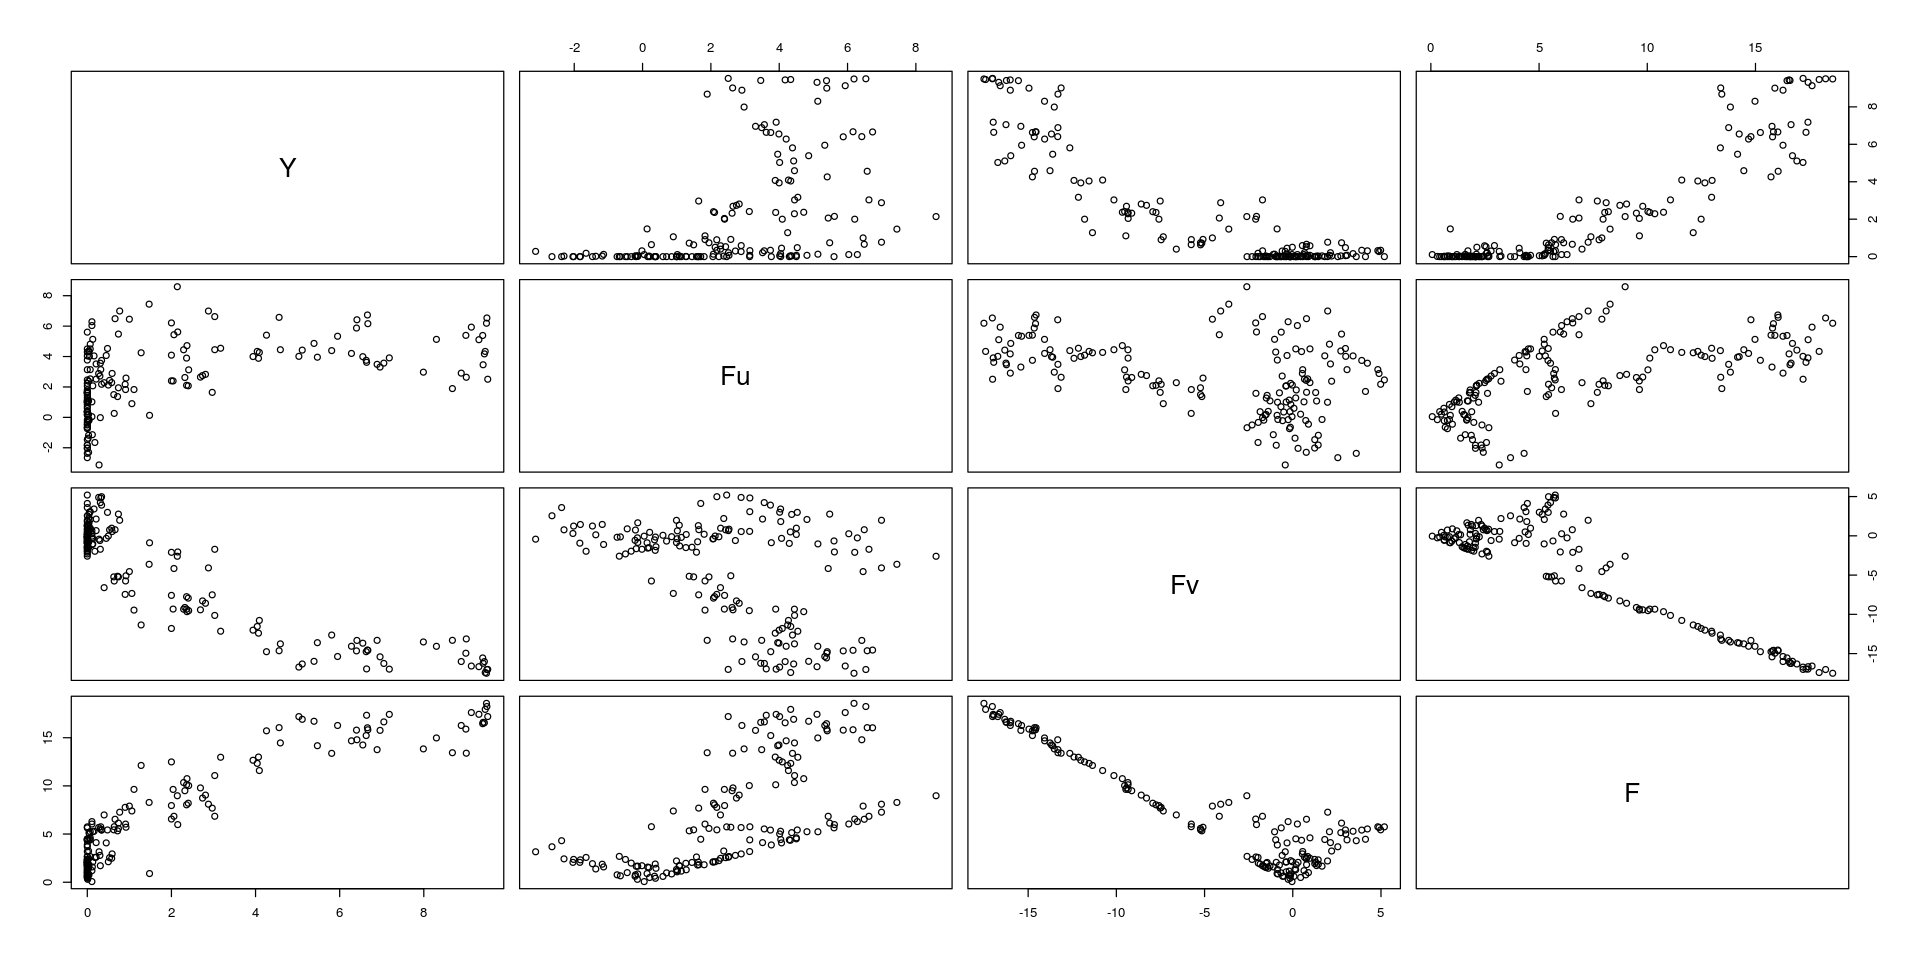

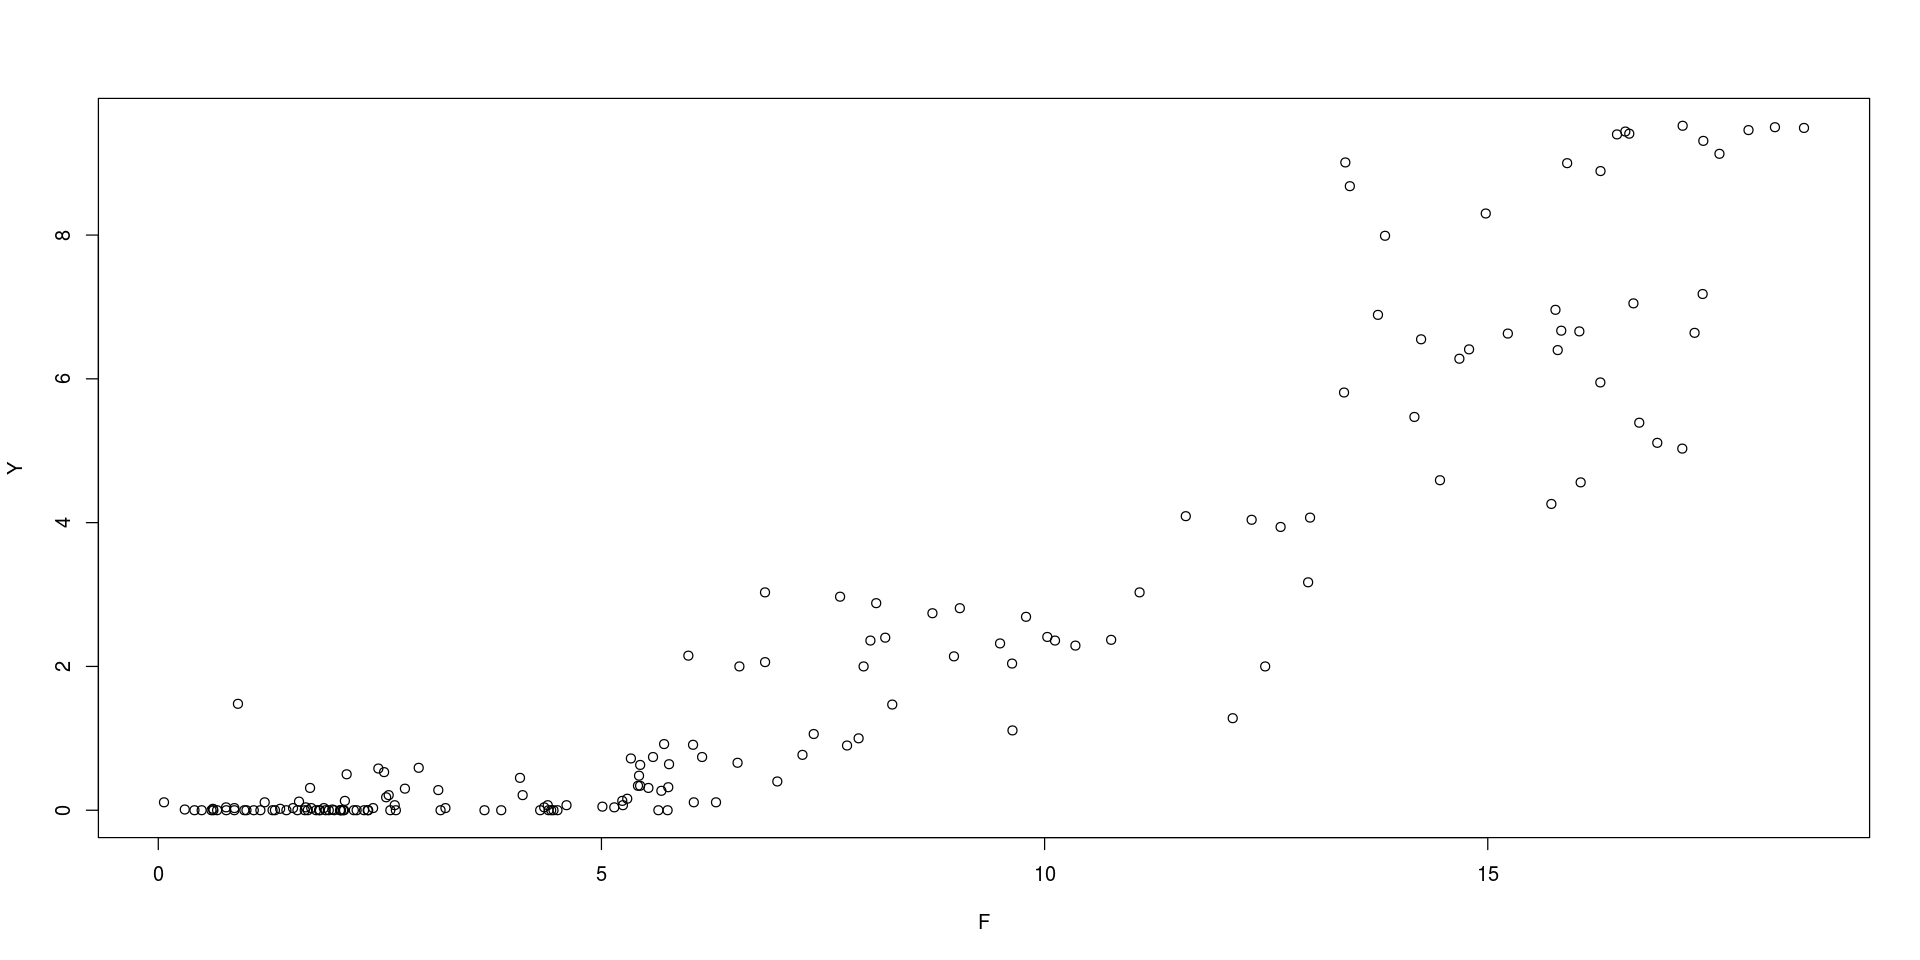


Call:
lm(formula = Y ~ I(F^3) - 1, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6797 -0.0463  0.0172  0.5034  4.8941 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)    
I(F^3) 1.713e-03  4.174e-05   41.04   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.101 on 167 degrees of freedom
Multiple R-squared:  0.9098,	Adjusted R-squared:  0.9093 
F-statistic:  1685 on 1 and 167 DF,  p-value: < 2.2e-16


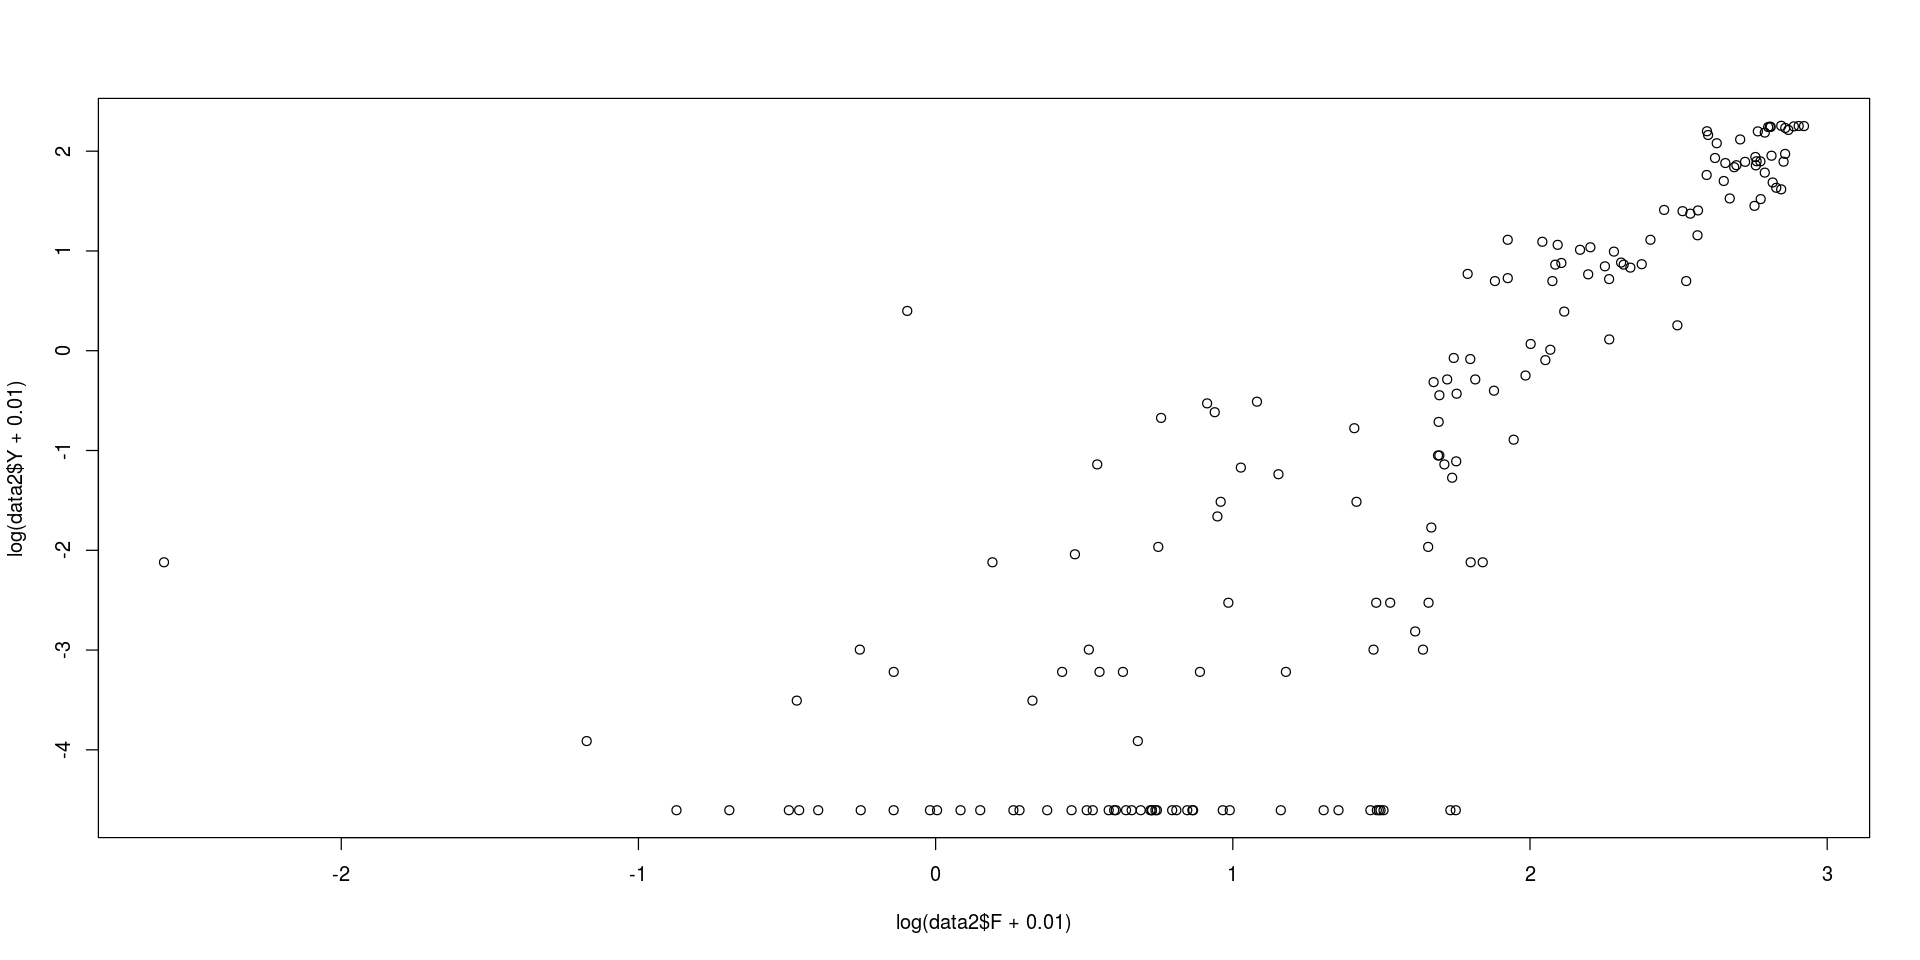

In [47]:
data2 <- cbind(Y = Y_train$Production, X_train[ ,c(19,20)])
names(data2) <- c("Y", "Fu", "Fv")
data2$F <- sqrt(data2$Fu^2+data2$Fv^2)
subset <- 25:192
data2 <- data2[subset, ]
pairs(data2)
with(data = data2, plot(Y ~ F))
plot(log(data2$Y+0.01) ~ log(data2$F+0.01))
summary(lm(Y~I(F^3)-1, data = data2))

In [48]:
str(temp_D2)

'data.frame':	37375 obs. of  3 variables:
 $ NWP1_12h_D.2_T: num  NA NA NA NA NA NA NA NA NA NA ...
 $ NWP1_18h_D.2_T: num  NA NA NA NA NA NA NA NA NA NA ...
 $ NWP1_00h_D.1_T: num  NA NA NA NA NA NA NA NA NA NA ...


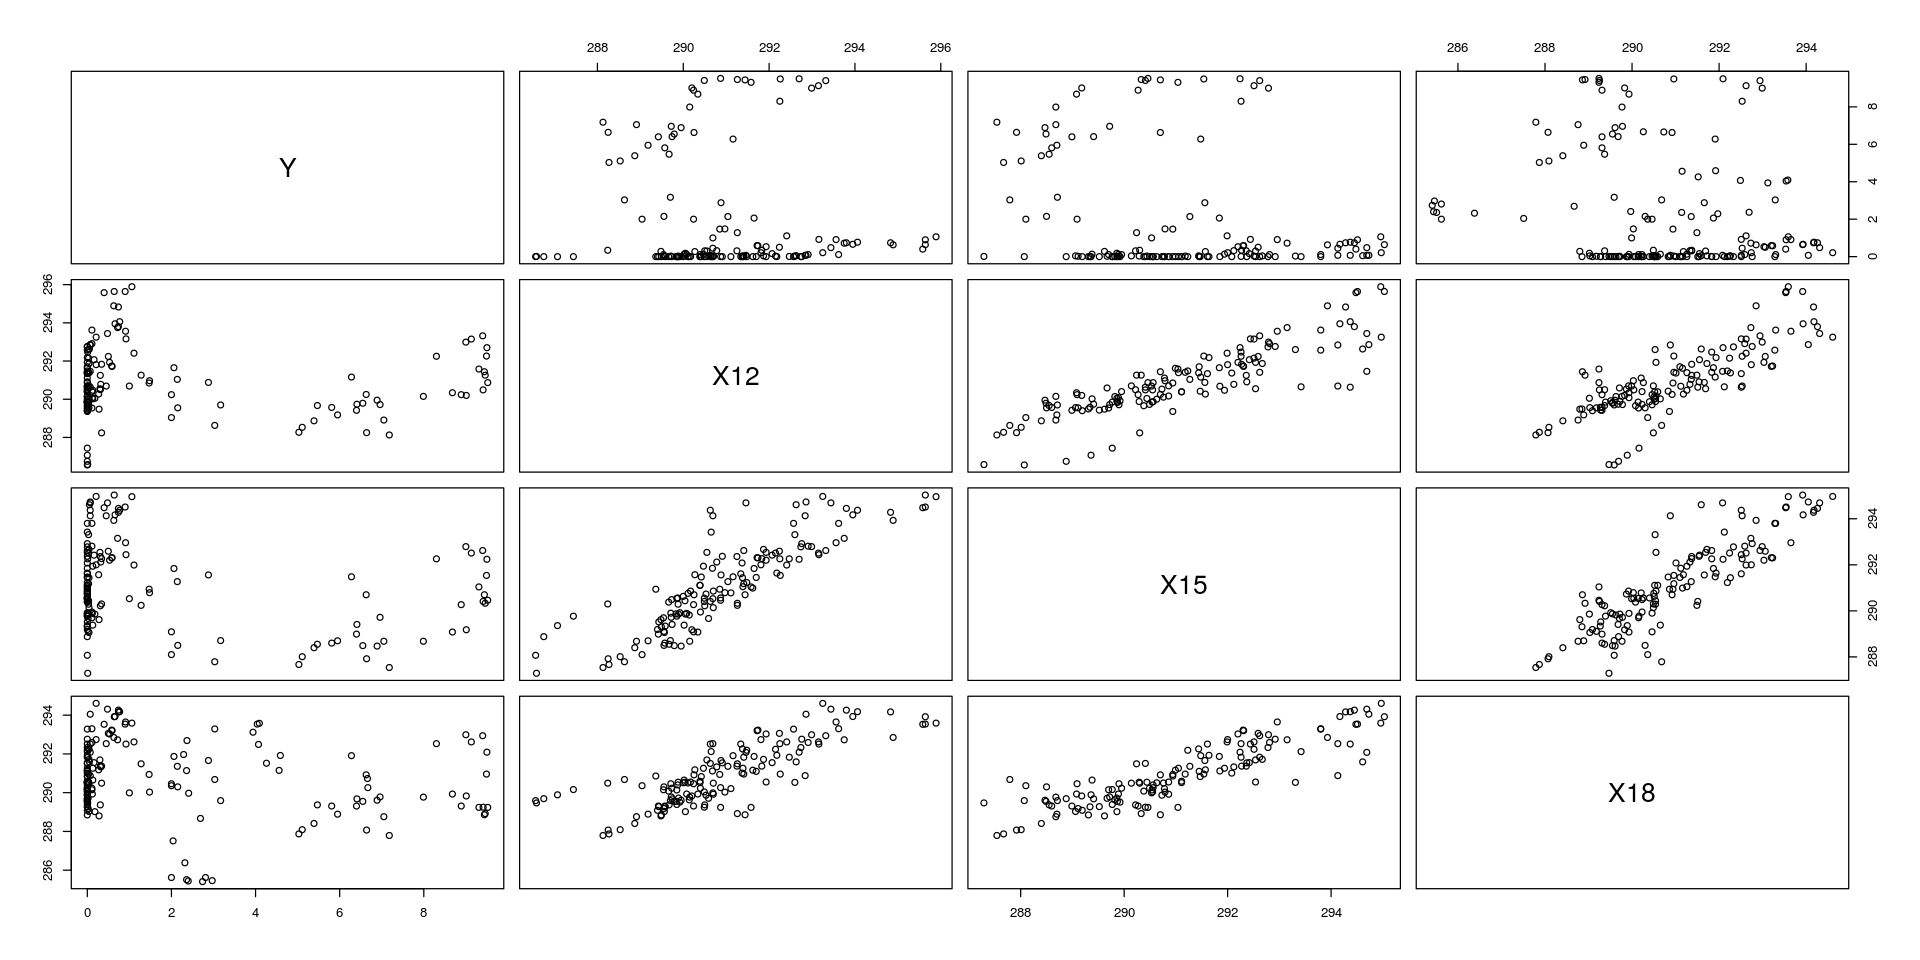

In [49]:
pairs(mydata[subset, ])

# Passage au set de test WF2

set de données utilisées : première semaine de WF2 (lignes 6192 → 6359)

In [101]:
data_all = cbind(Y = Y_train$Production, X_train[ ,c(16,17,18)])
names(data_all) <- c("Y", "U", "V", "T")

Ajout de variables complémentaires :
Yt --> Racine carré de la production,
F  --> Force du vent,
F_seuil --> Fonction seuil pour représenter le suil de rpoduction à partir d'une certaine force (ici = 18)

In [121]:
data_all$Yt = (data_all$Y)^(1/2)
data_all$F <- sqrt(data_all$U^2 + data_all$V^2)
data_all$F_seuil = pmax(17-data_all$F,0) # 18 = seuil sur la force
data_all$F_seuil_bis = pmin(data_all$F,17) # 18 = seuil sur la force

In [122]:
GT <- data_all$T
GT[2:length(GT)] = GT[2:length(GT)] - GT[1:length(GT)-1]
GT[1] = 0
GT[length(GT)] = 0
data_all$GT <- GT

suppression des données manquantes :

In [123]:
index= is.na(data_all$T) & is.na(data_all$U) & is.na(data_all$V) &  is.na(data_all$GT) 
sel <- c(1:8)
data_all <- data_all[complete.cases( data_all[,sel]),] #suppression des lignes contenant NA

Réduction à des datasets plus petits :

In [124]:
subset_week <- 6264:6431
data_week <- data_all[subset_week, ]
subset_month <- 6264:7007
data_month <- data_all[subset_month, ]
subset_all_WF2 <- 6264:12479
data_all_WF2 <- data_all[subset_all_WF2, ]

## Utilisation Force du vent

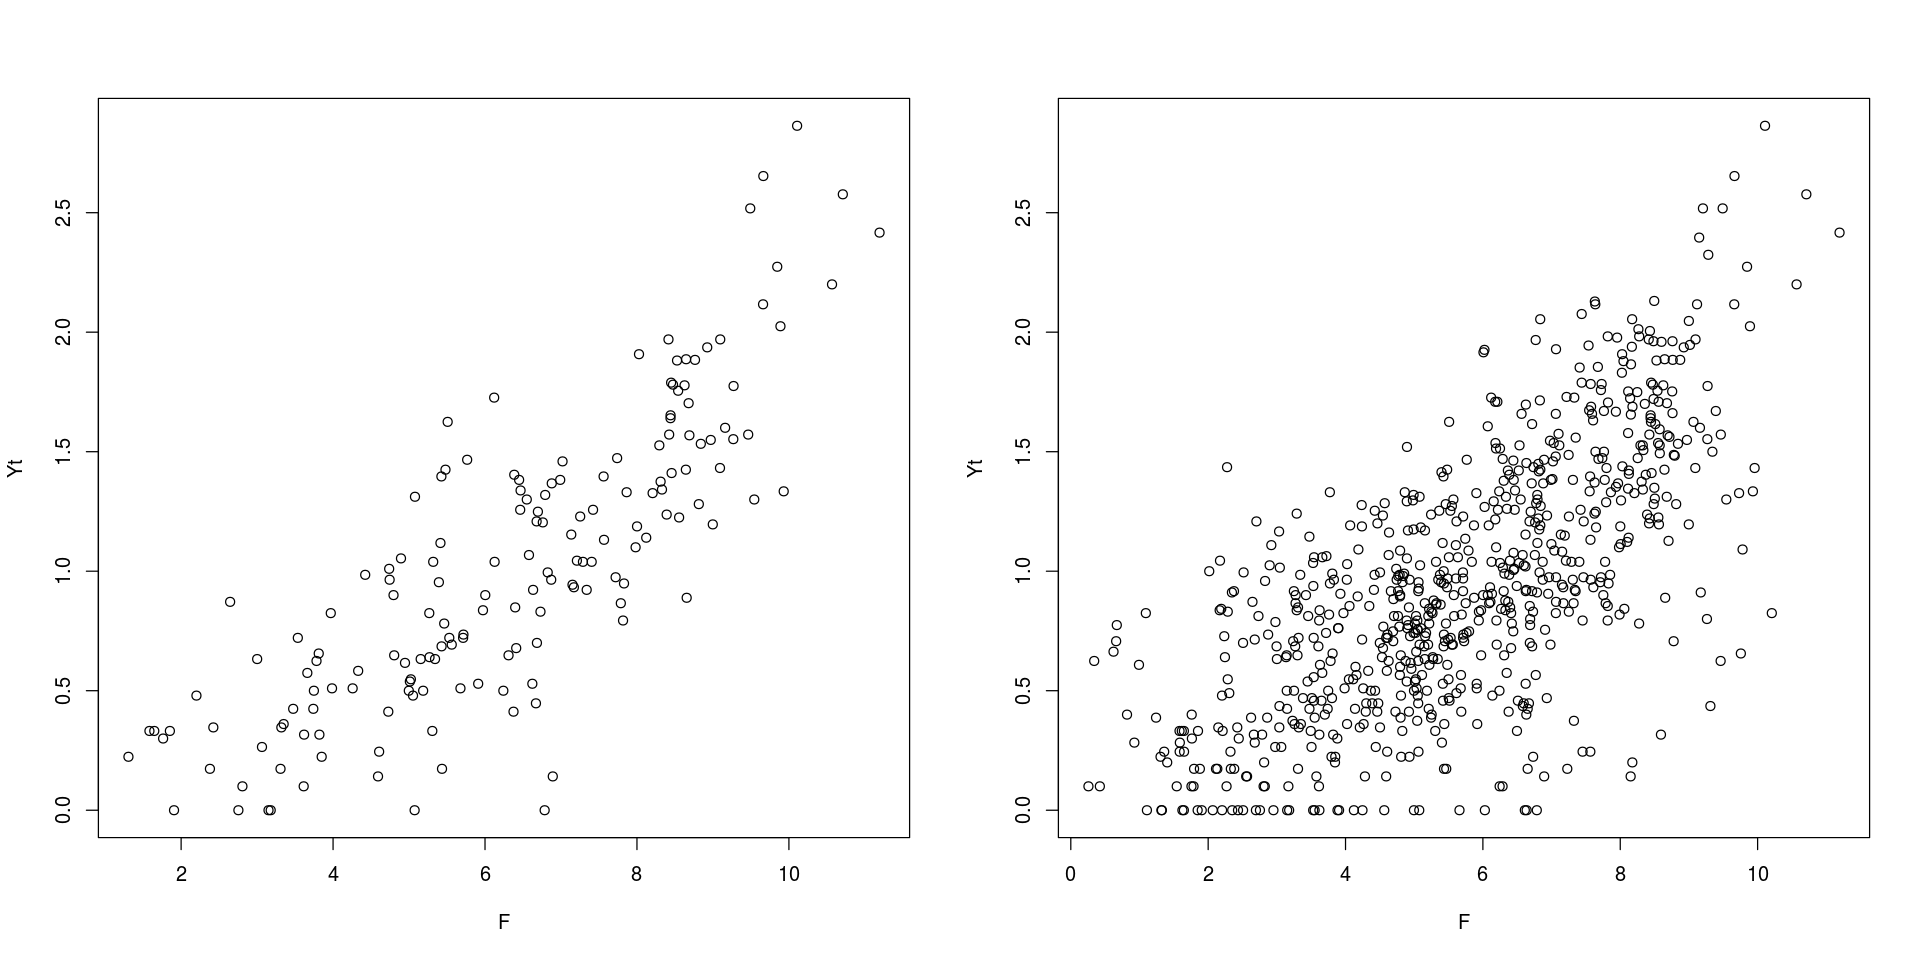

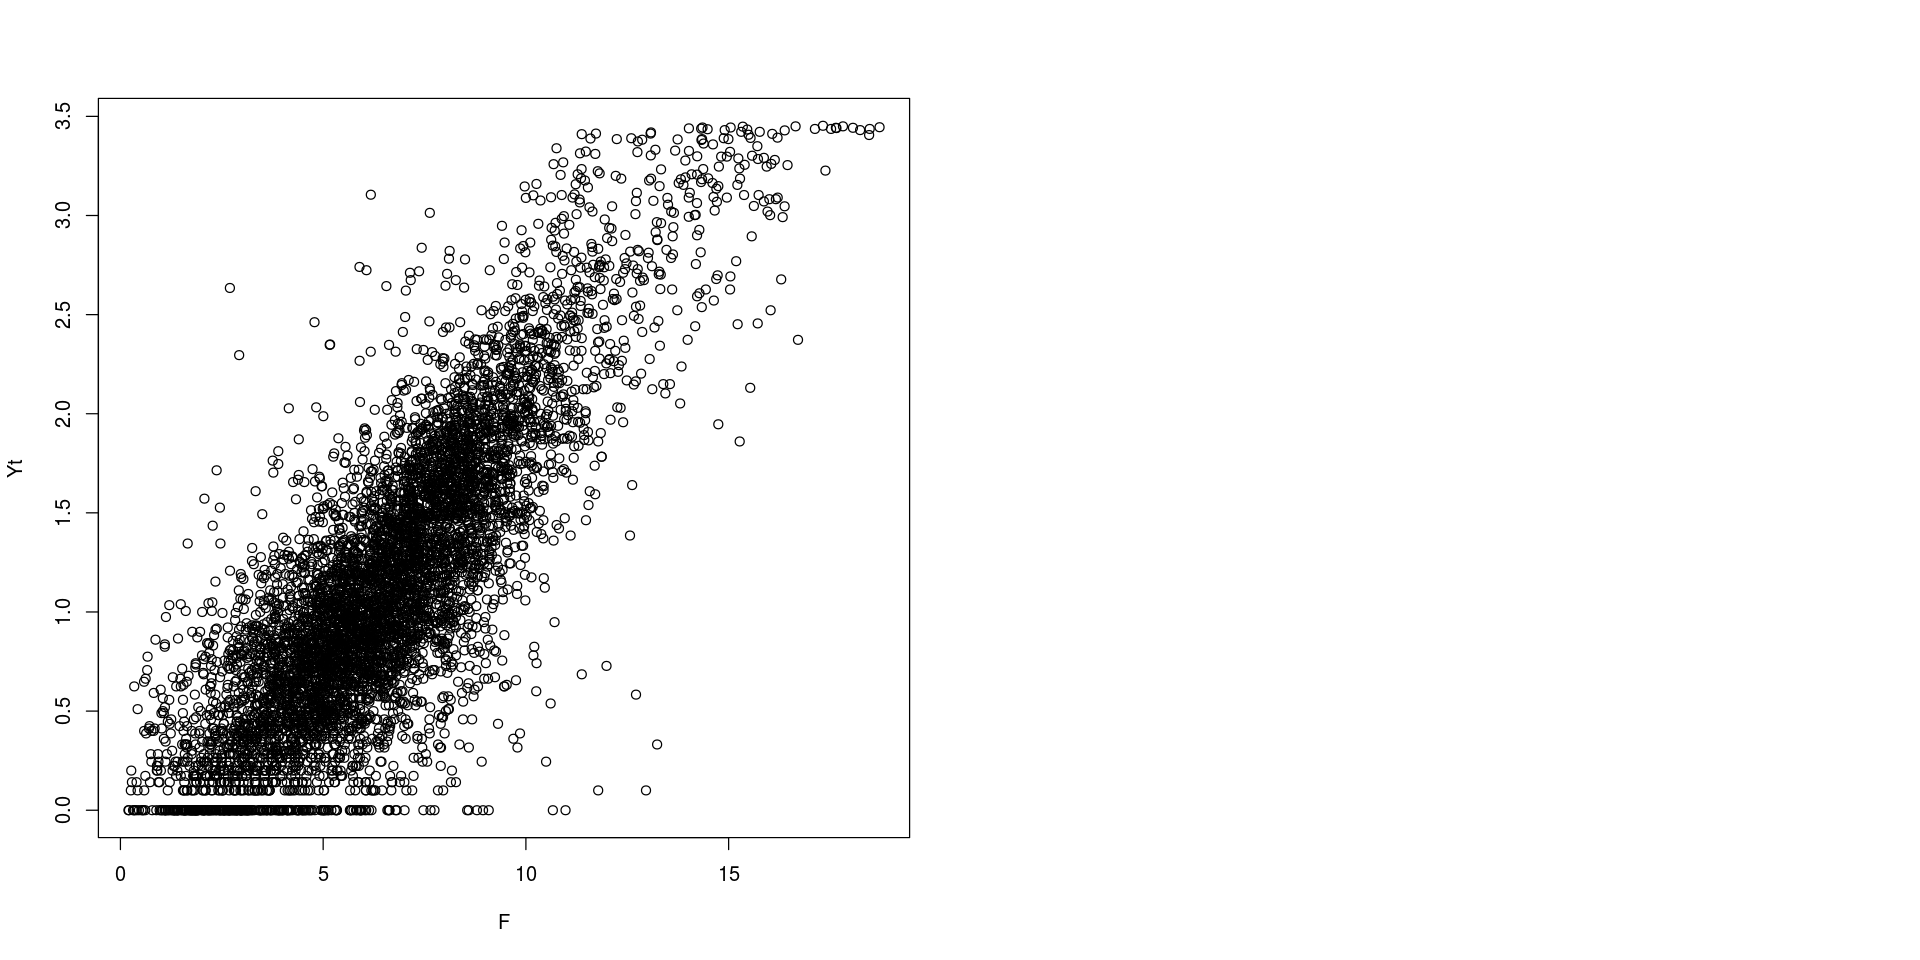

In [125]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
with(data = data_week, plot(Yt ~ F))
with(data = data_month, plot(Yt ~ F))
with(data = data_all_WF2, plot(Yt ~ F))

In [15]:
#summary(lm(Y~F, data = data_week))
summary(lm(Y~F-1, data = data_week))
#summary(lm(Y~I(F^3)-1, data = data_week))
#summary(lm(Y~I(F^3)-1, data = data_week))


Call:
lm(formula = Y ~ F - 1, data = data_week)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1485 -1.2961 -0.7062  0.4840  3.6225 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
F  0.41468    0.01111   37.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.451 on 144 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.9063,	Adjusted R-squared:  0.9057 
F-statistic:  1393 on 1 and 144 DF,  p-value: < 2.2e-16


In [16]:
summary(lm(Y~F-1, data = data_month))
m <- lm(Yt~F, data = data_month)
summary(m)
#summary(lm(Y~I(F^3)-1, data = data_month))
m3 <- lm(Yt~I(F^2)-1, data = data_month)


Call:
lm(formula = Y ~ F - 1, data = data_month)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0915 -1.1175 -0.6020  0.0995  5.0368 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
F 0.312946   0.006537   47.87   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.293 on 719 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.7612,	Adjusted R-squared:  0.7609 
F-statistic:  2292 on 1 and 719 DF,  p-value: < 2.2e-16



Call:
lm(formula = Yt ~ F, data = data_month)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.36726 -0.25520 -0.00043  0.28429  1.27189 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.035155   0.034845   1.009    0.313    
F           0.166711   0.004727  35.267   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4059 on 718 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.634,	Adjusted R-squared:  0.6335 
F-statistic:  1244 on 1 and 718 DF,  p-value: < 2.2e-16


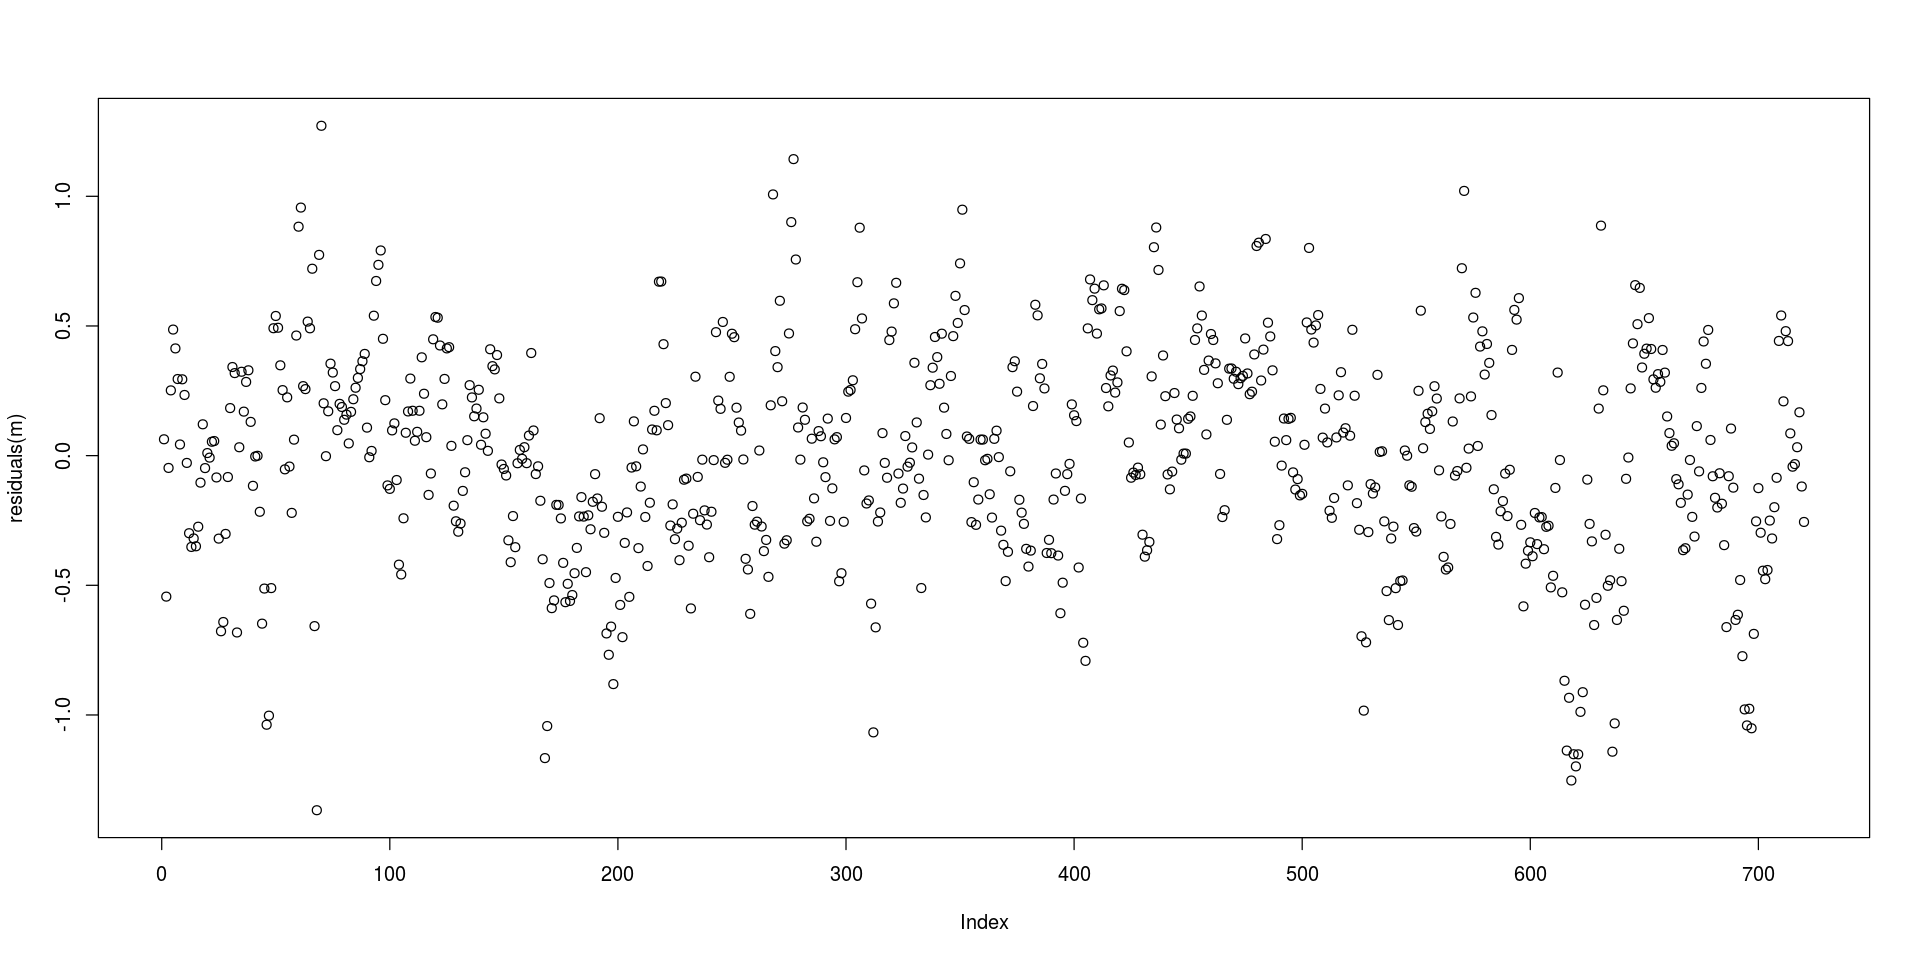

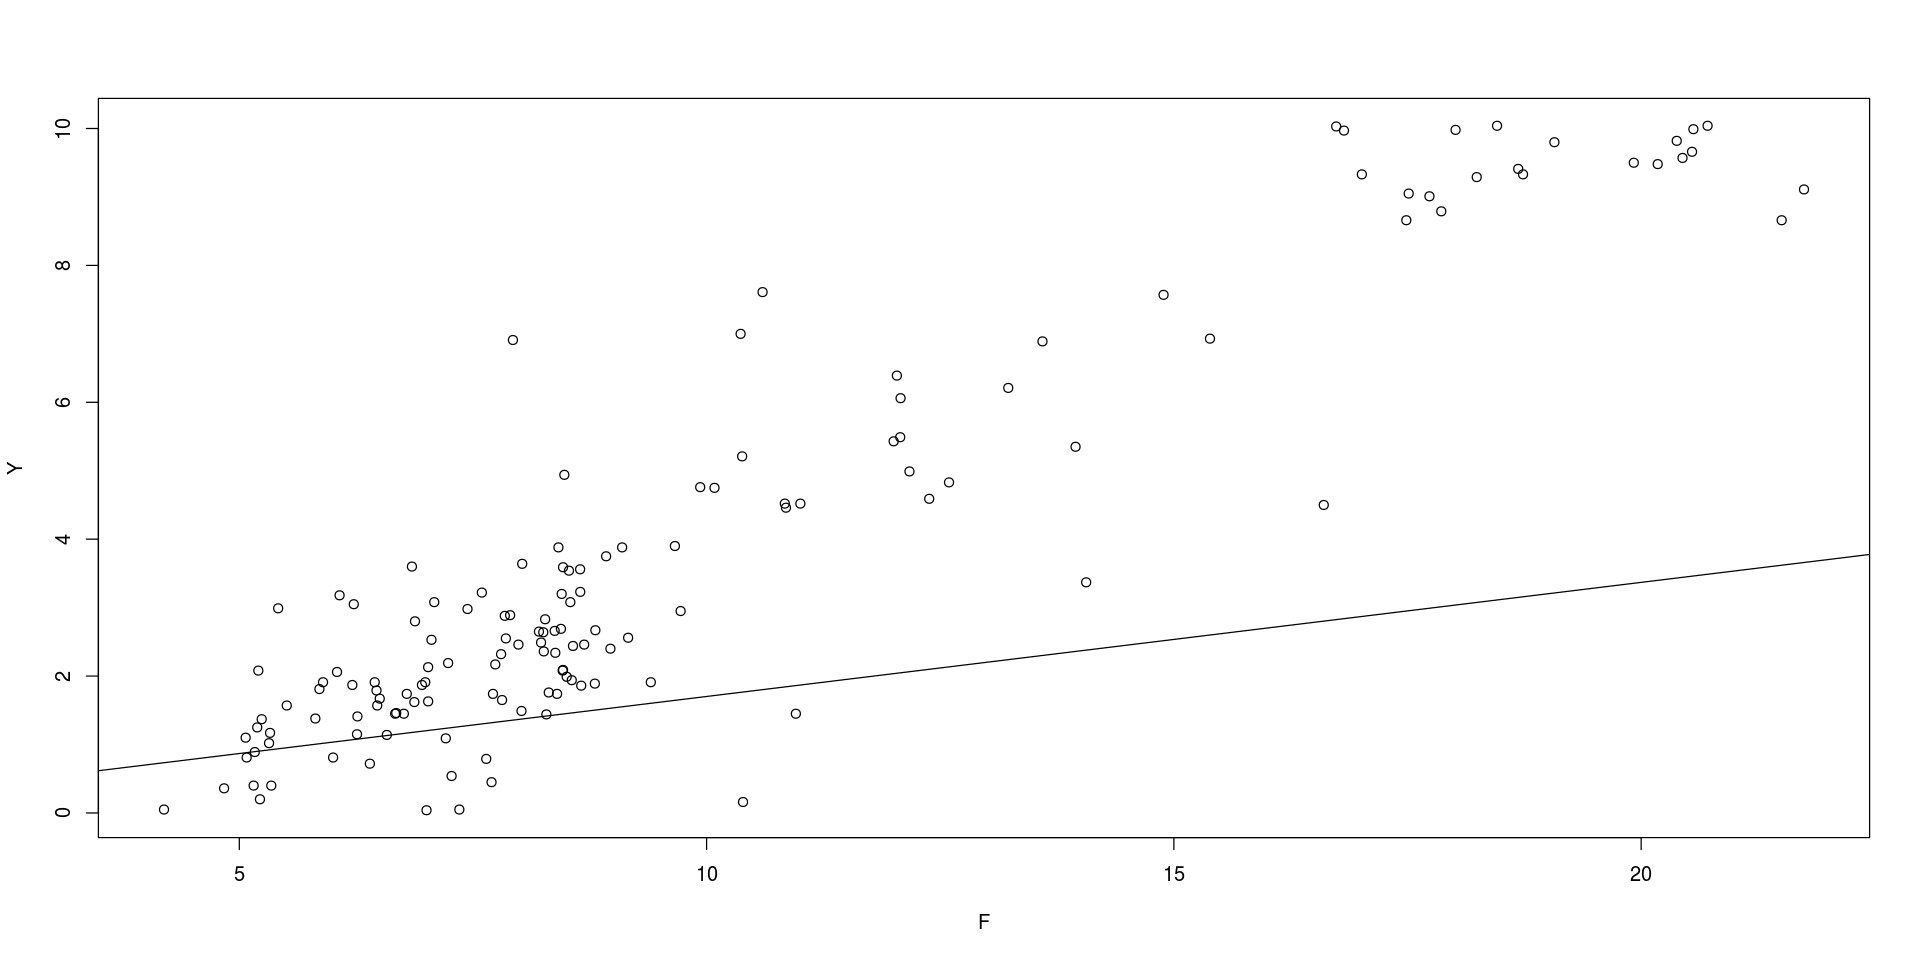

In [17]:
plot(residuals(m))
plot(Y ~ F, data = data_week)
abline(m)

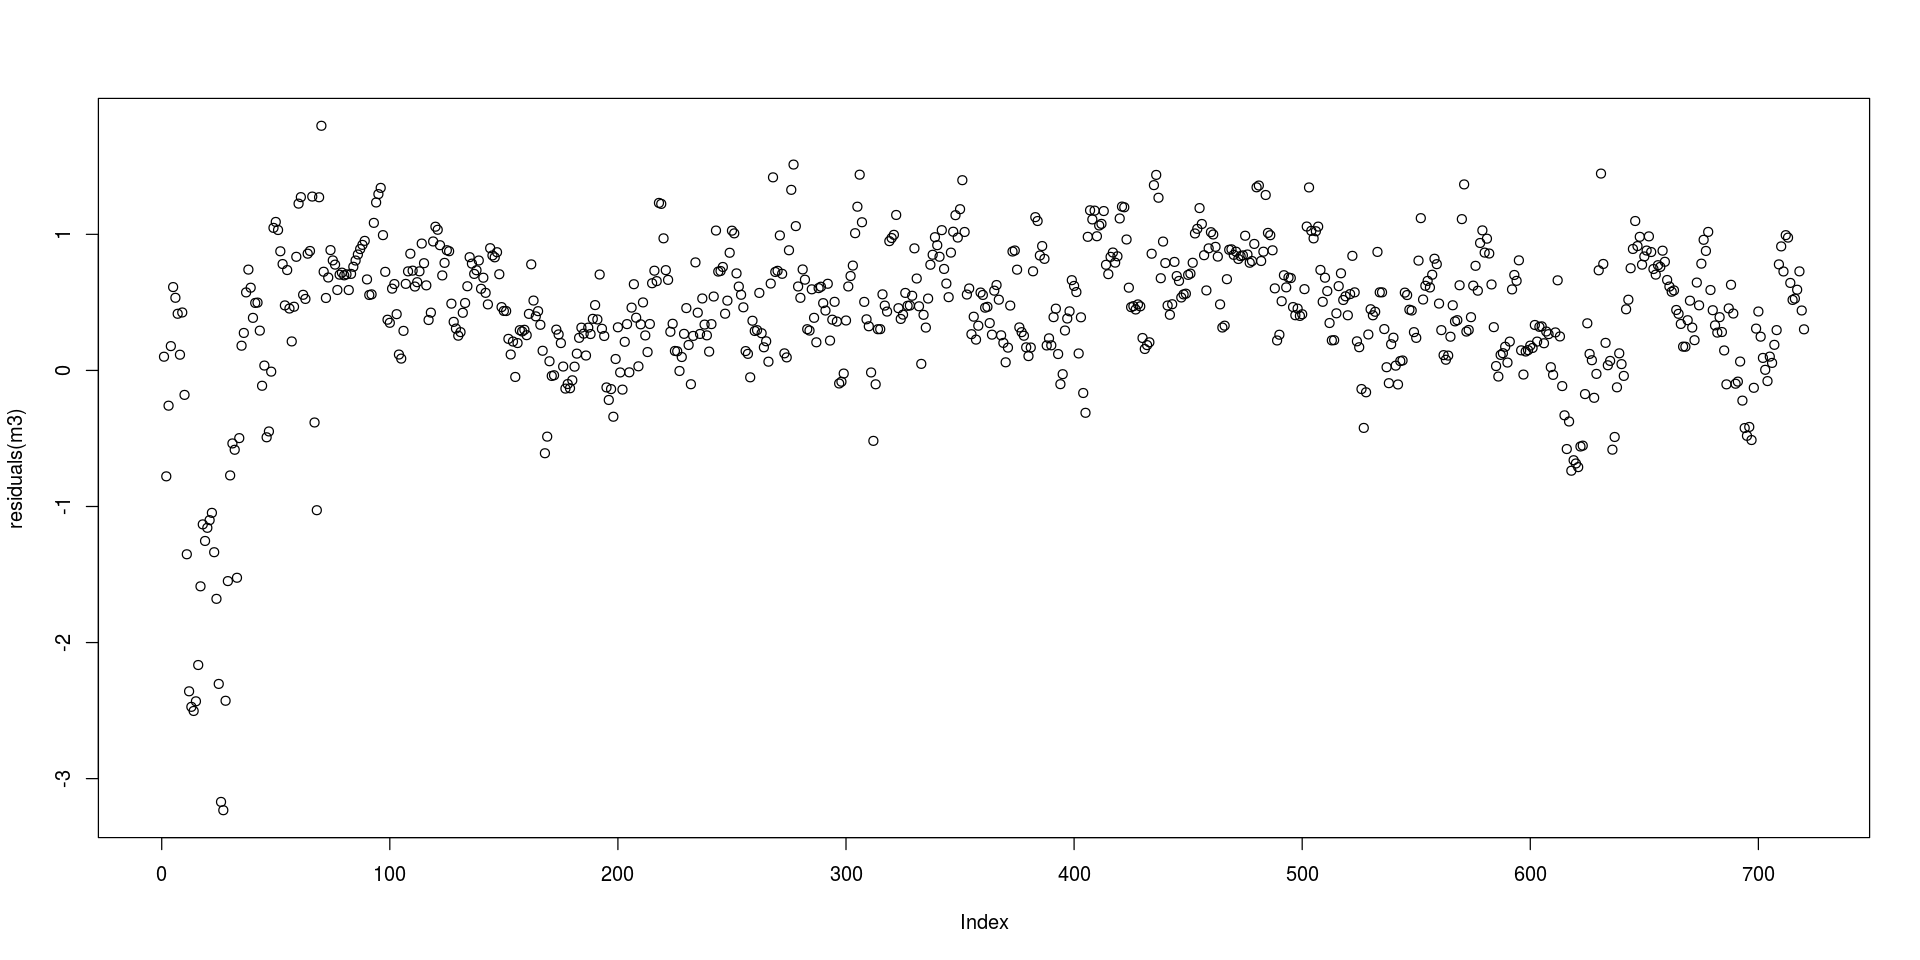

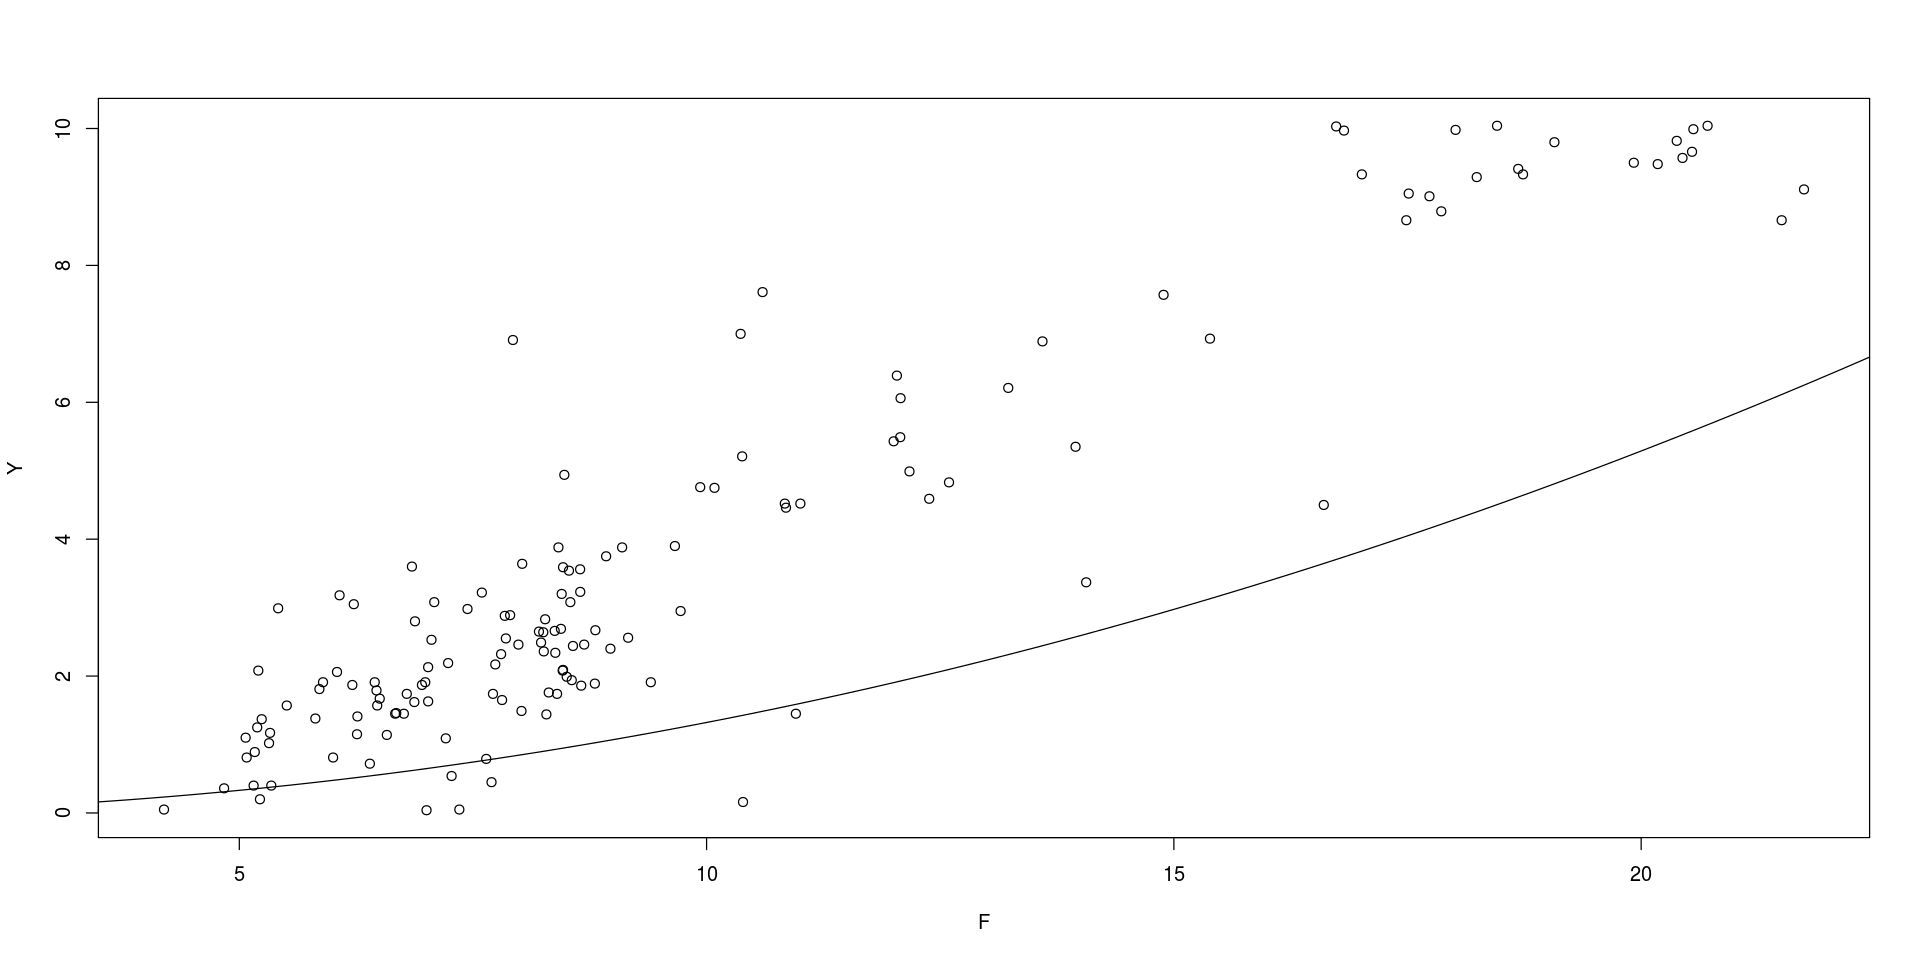

In [18]:
plot(residuals(m3))
plot(Y ~ F, data = data_week)
X = seq(0,25,length=100)
P = predict(m3,newdata = data.frame(F=X))
lines(X,P)

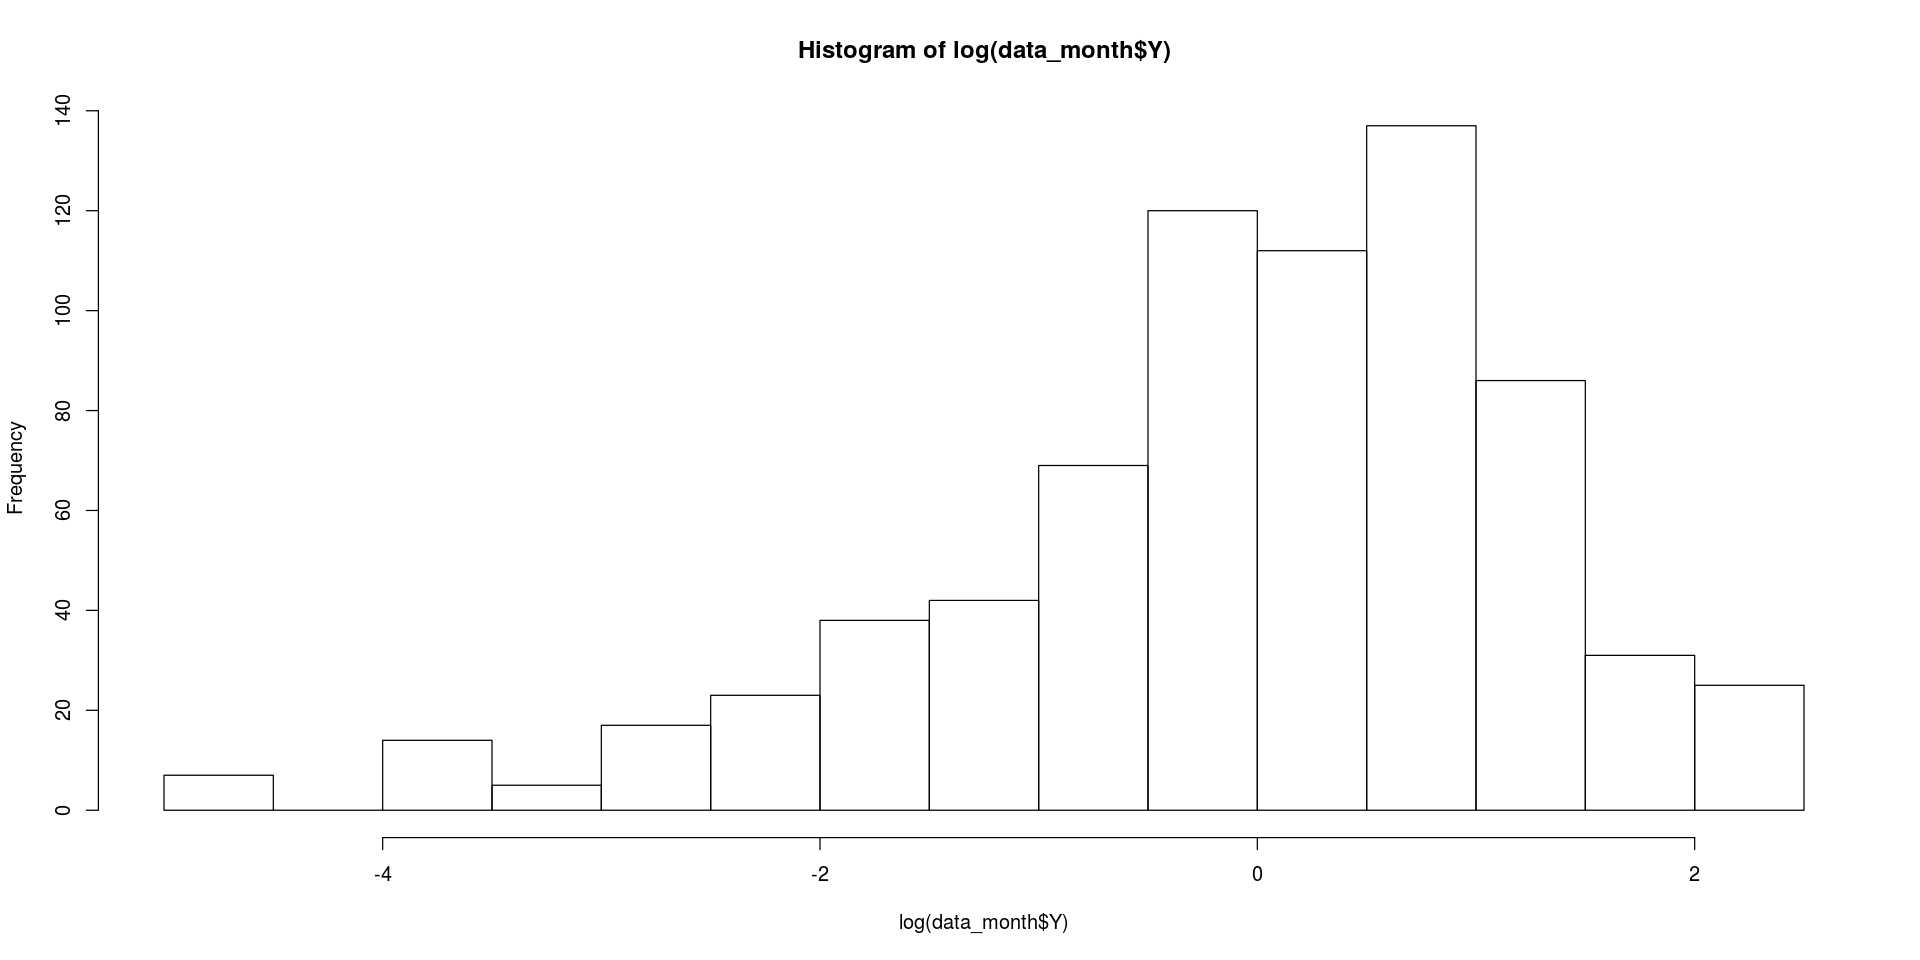

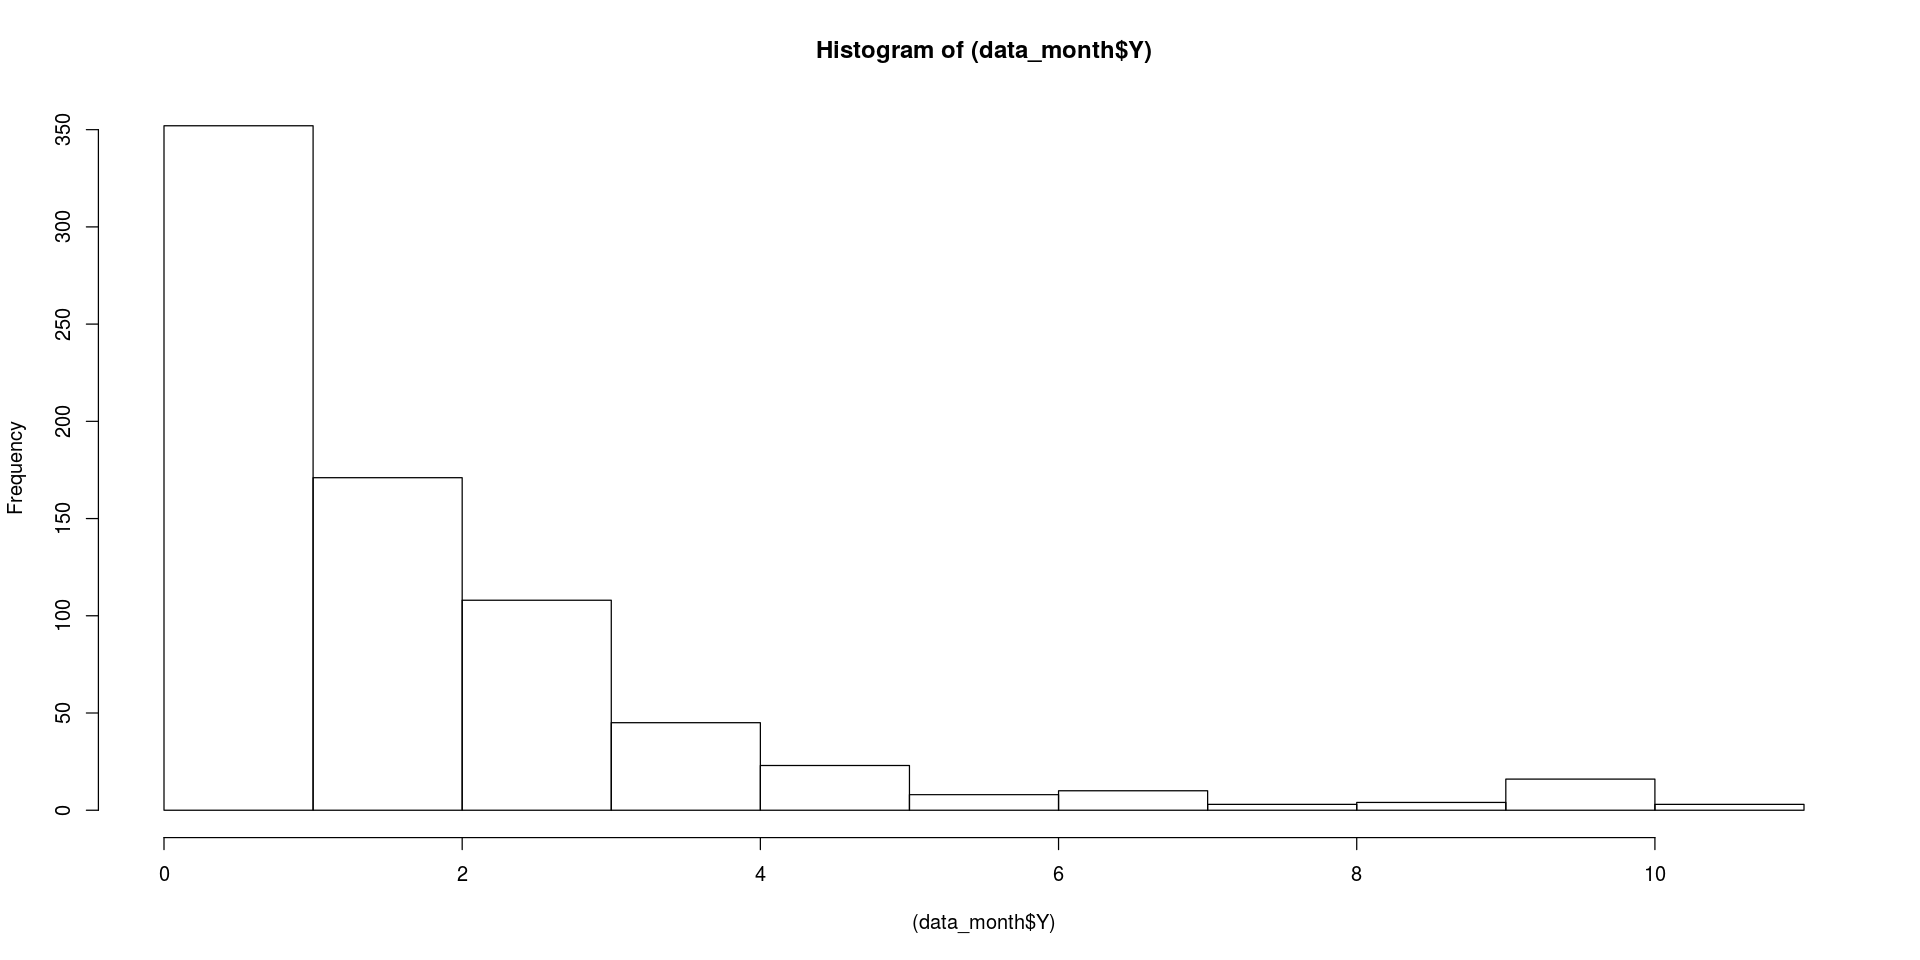

In [19]:
hist(log(data_month$Y))
hist((data_month$Y))

In [106]:
m4 <-lm(Yt~F-1, data = data_month)
summary(m4)


Call:
lm(formula = Yt ~ F - 1, data = data_month)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37590 -0.25362 -0.01457  0.27138  1.27363 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
F 0.170926   0.002243   76.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.399 on 815 degrees of freedom
Multiple R-squared:  0.8769,	Adjusted R-squared:  0.8768 
F-statistic:  5807 on 1 and 815 DF,  p-value: < 2.2e-16


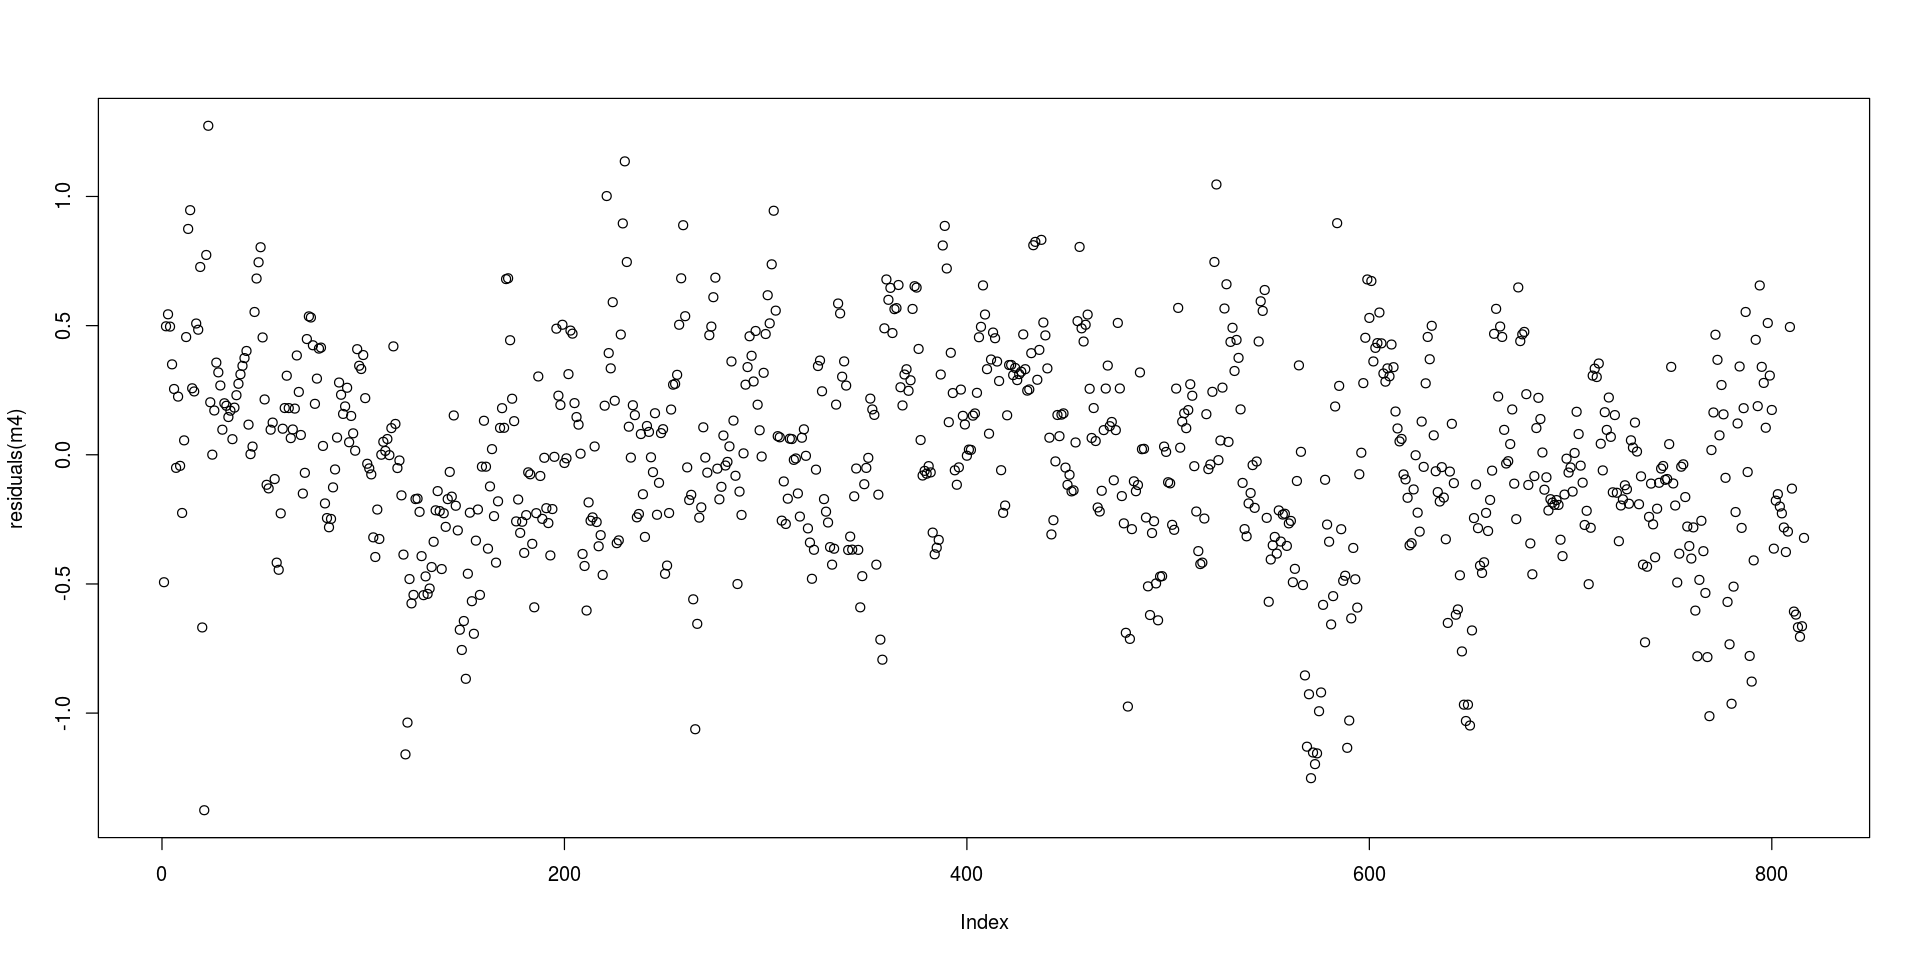

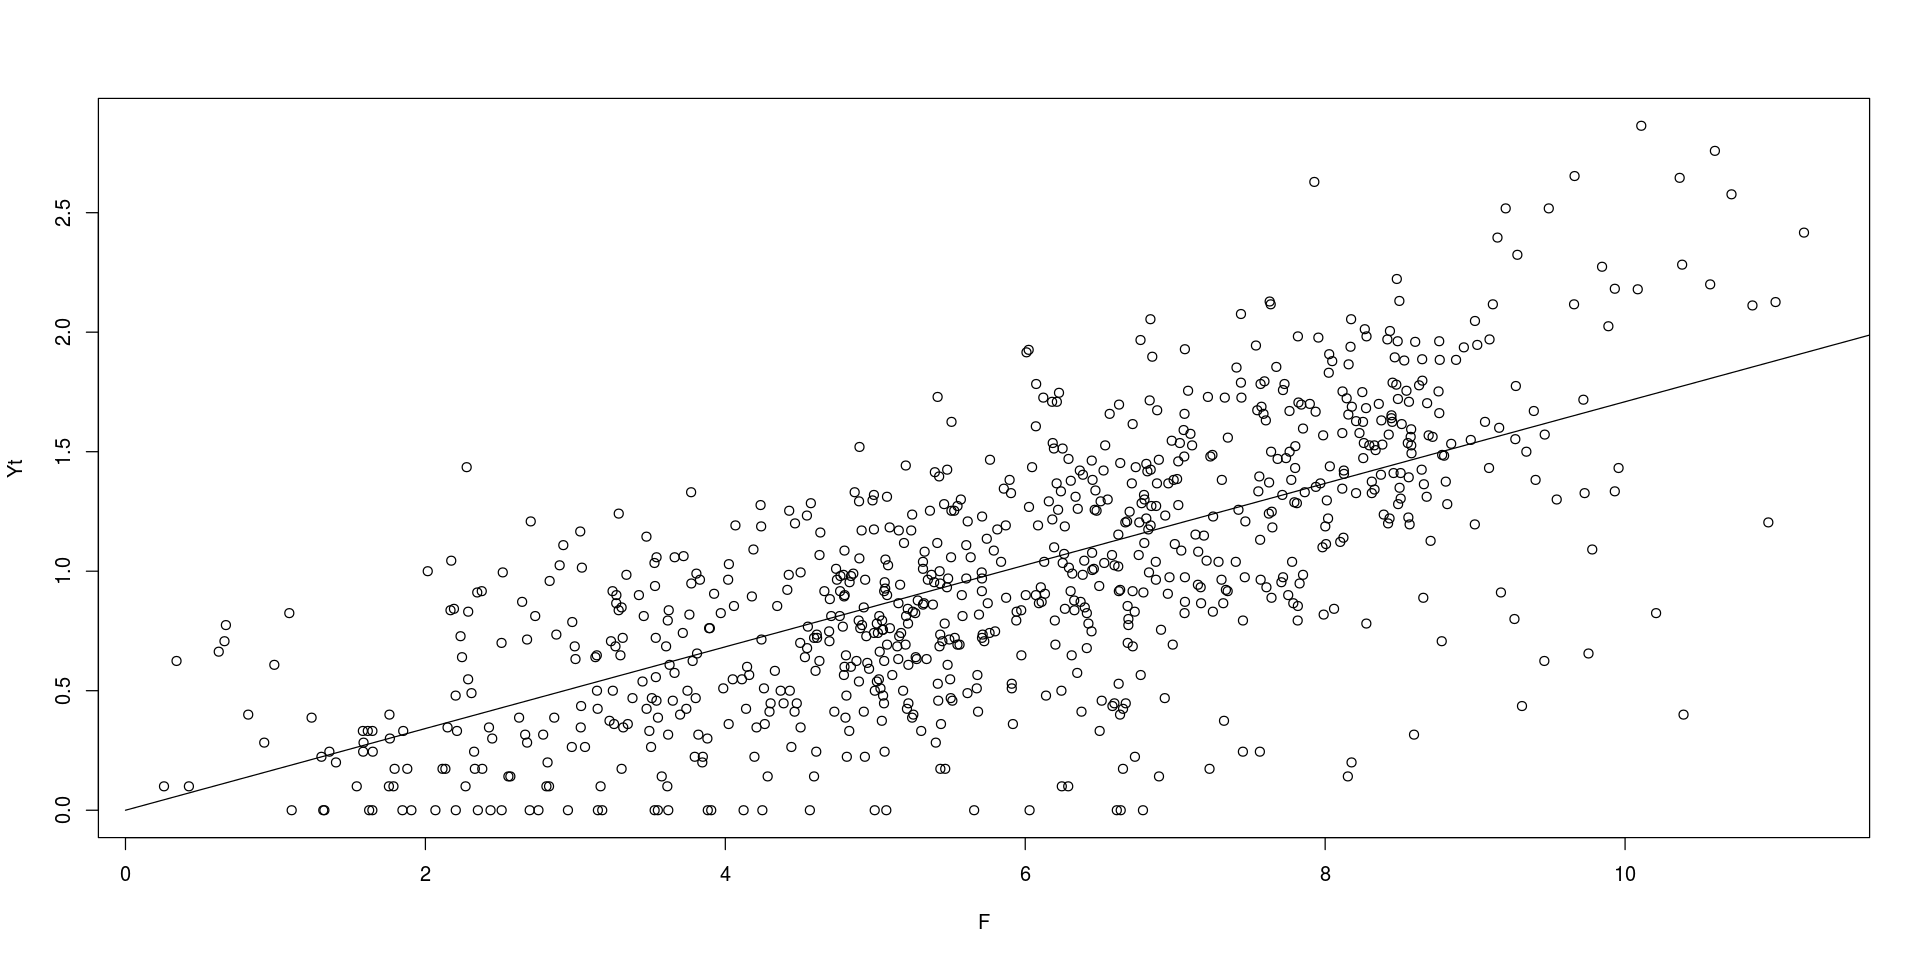

In [107]:
plot(residuals(m4))
plot(Yt ~ F, data = data_month)
X = seq(0,25,length=100) # 25 = range de F
P = predict(m4,newdata = data.frame(F=X))
P = pmin(P,3) #seuil à tester
lines(X,P)

paramètres à tester/évaluer :
puissance pour la transformation de Y
seuil

In [126]:
m4_bis <-lm(Yt~F_seuil_bis-1, data = data_month)
summary(m4_bis)


Call:
lm(formula = Yt ~ F_seuil_bis - 1, data = data_month)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.21919 -0.24583 -0.02676  0.28019  1.17636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
F_seuil_bis 0.166919   0.002385   69.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3949 on 743 degrees of freedom
Multiple R-squared:  0.8683,	Adjusted R-squared:  0.8681 
F-statistic:  4898 on 1 and 743 DF,  p-value: < 2.2e-16


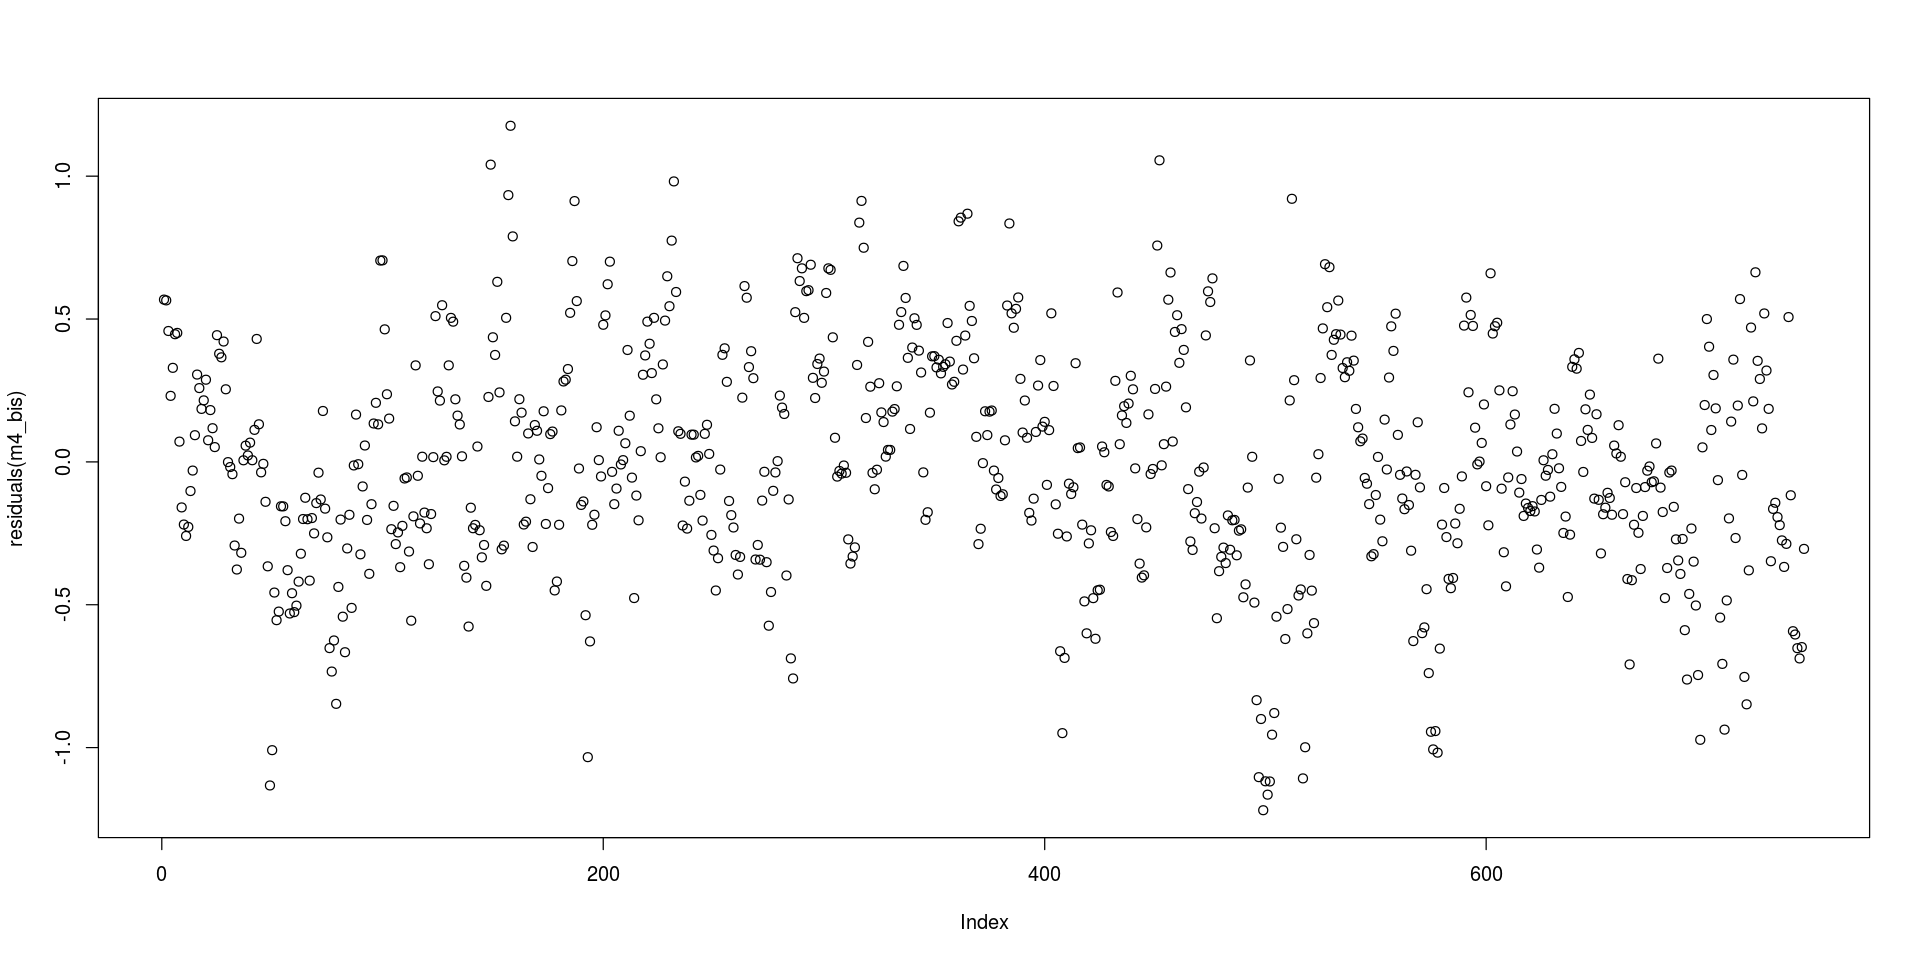

ERROR: Error in eval(predvars, data, env): objet 'F_seuil_bis' introuvable


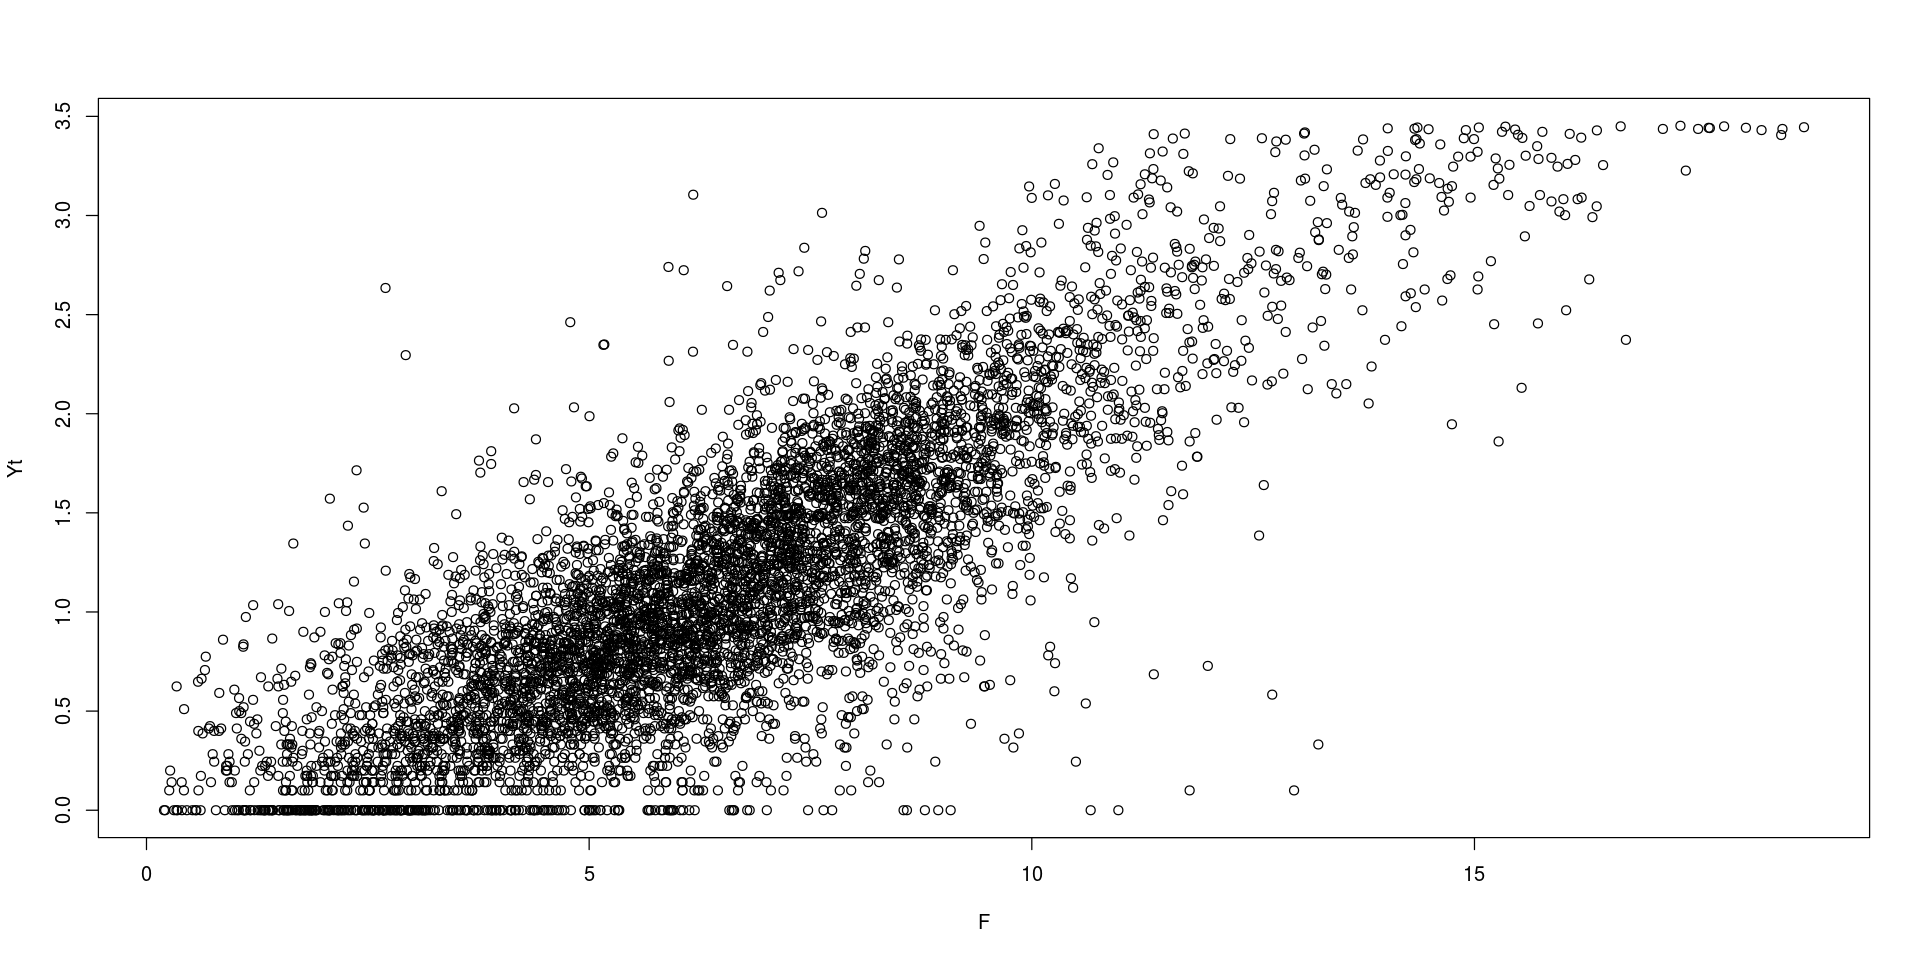

In [127]:
plot(residuals(m4_bis))
plot(Yt ~ F, data = data_all_WF2)
X = seq(0,25,length=100) # 25 = range de F
P = predict(m4_bis,newdata = data.frame(F=X))
#P = pmin(P,3) #seuil à tester
lines(X,P)

## Utilisation Température

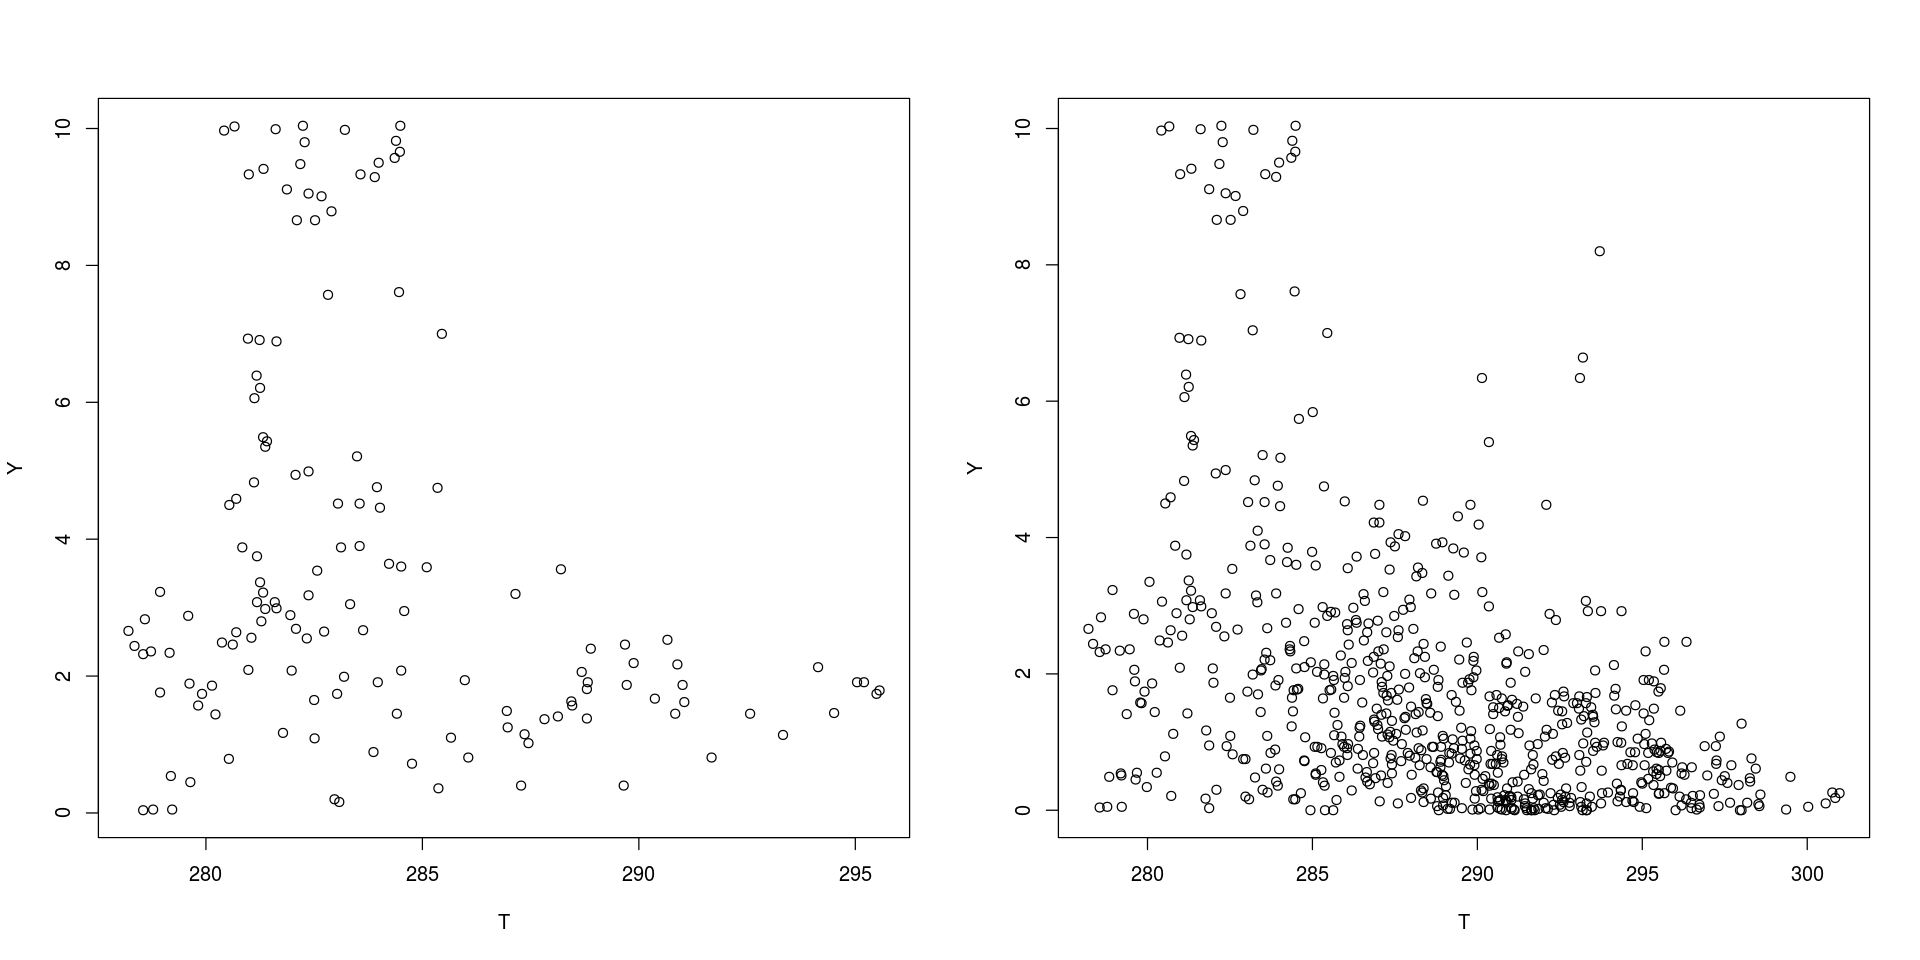

In [22]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
with(data = data_week, plot(Y ~ T))
with(data = data_month, plot(Y ~ T))

In [23]:
names(X_train[,18,drop=FALSE])

[1] "NWP1_00h_D.1_T"

lien à priori : si température supérieure à un seuil alors production diminue largment

### Travail avec le gradient 

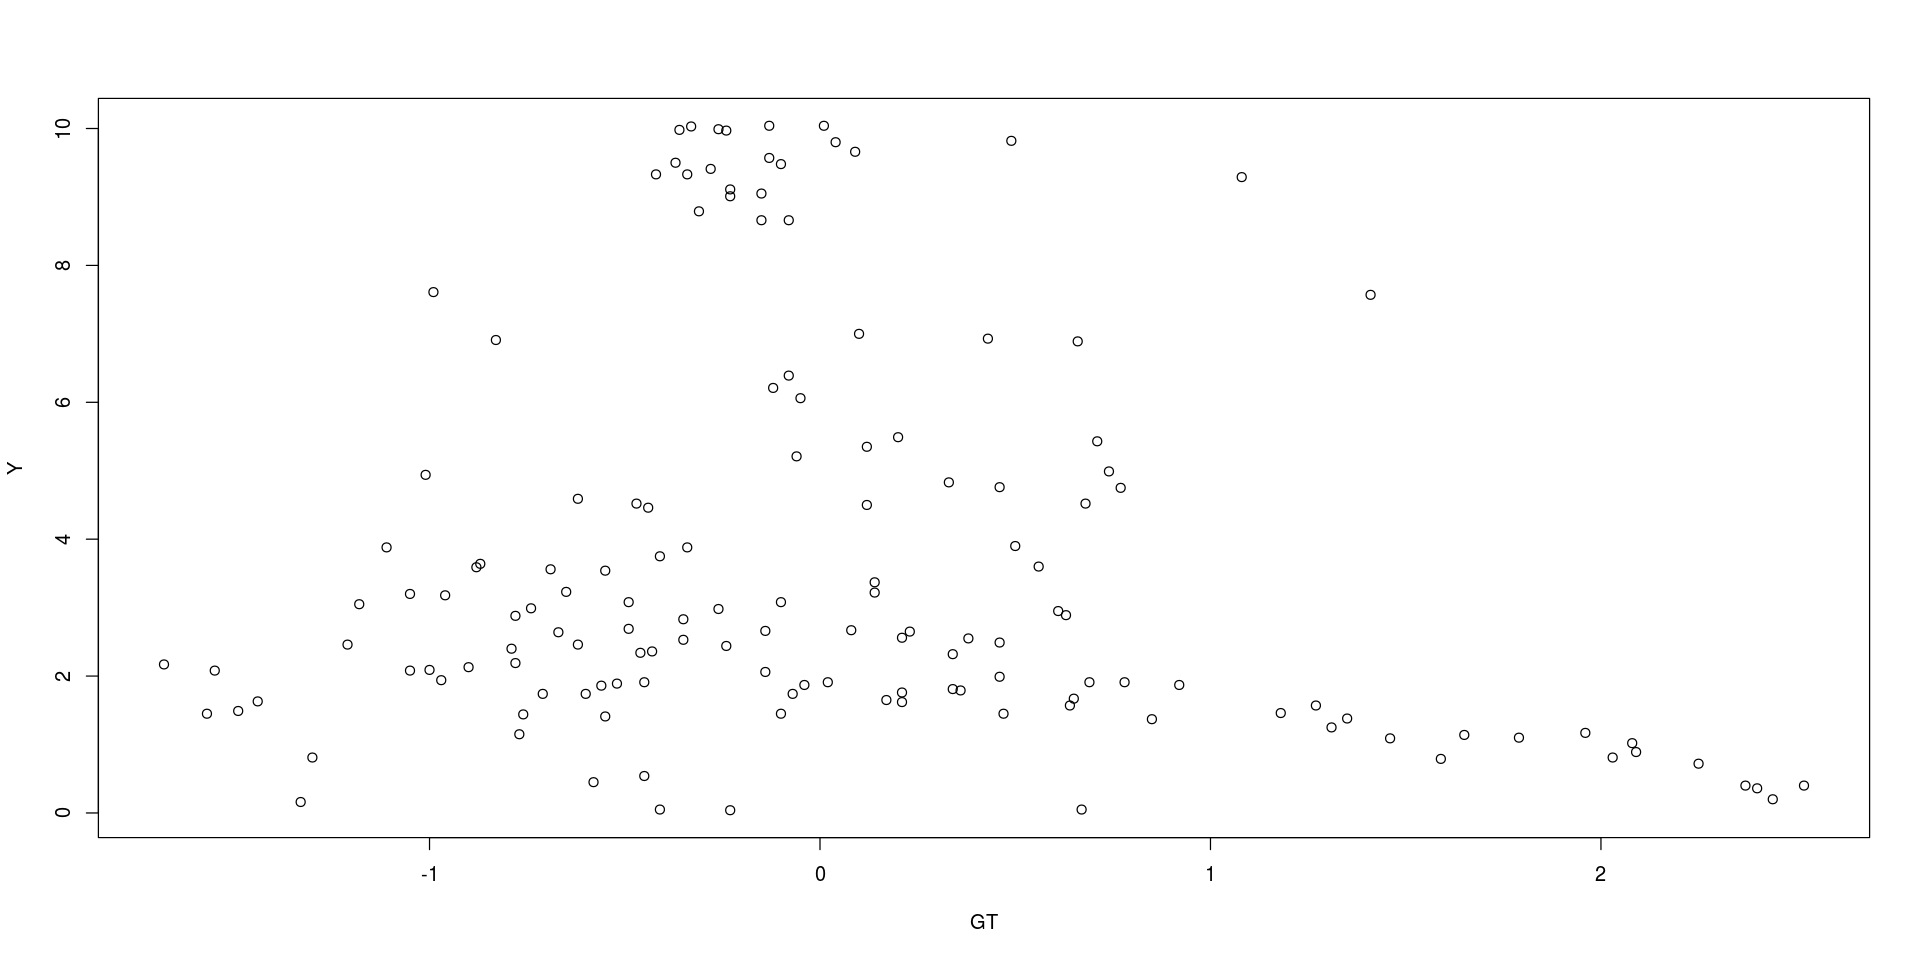

In [24]:
with(data = data_week, plot(Y ~ GT))

In [25]:
for (i in 1:24) {
   data_week$GT <- data_week$GT + (data_week$T - data_all[subset_week-i, ]$T)/data_week$T}

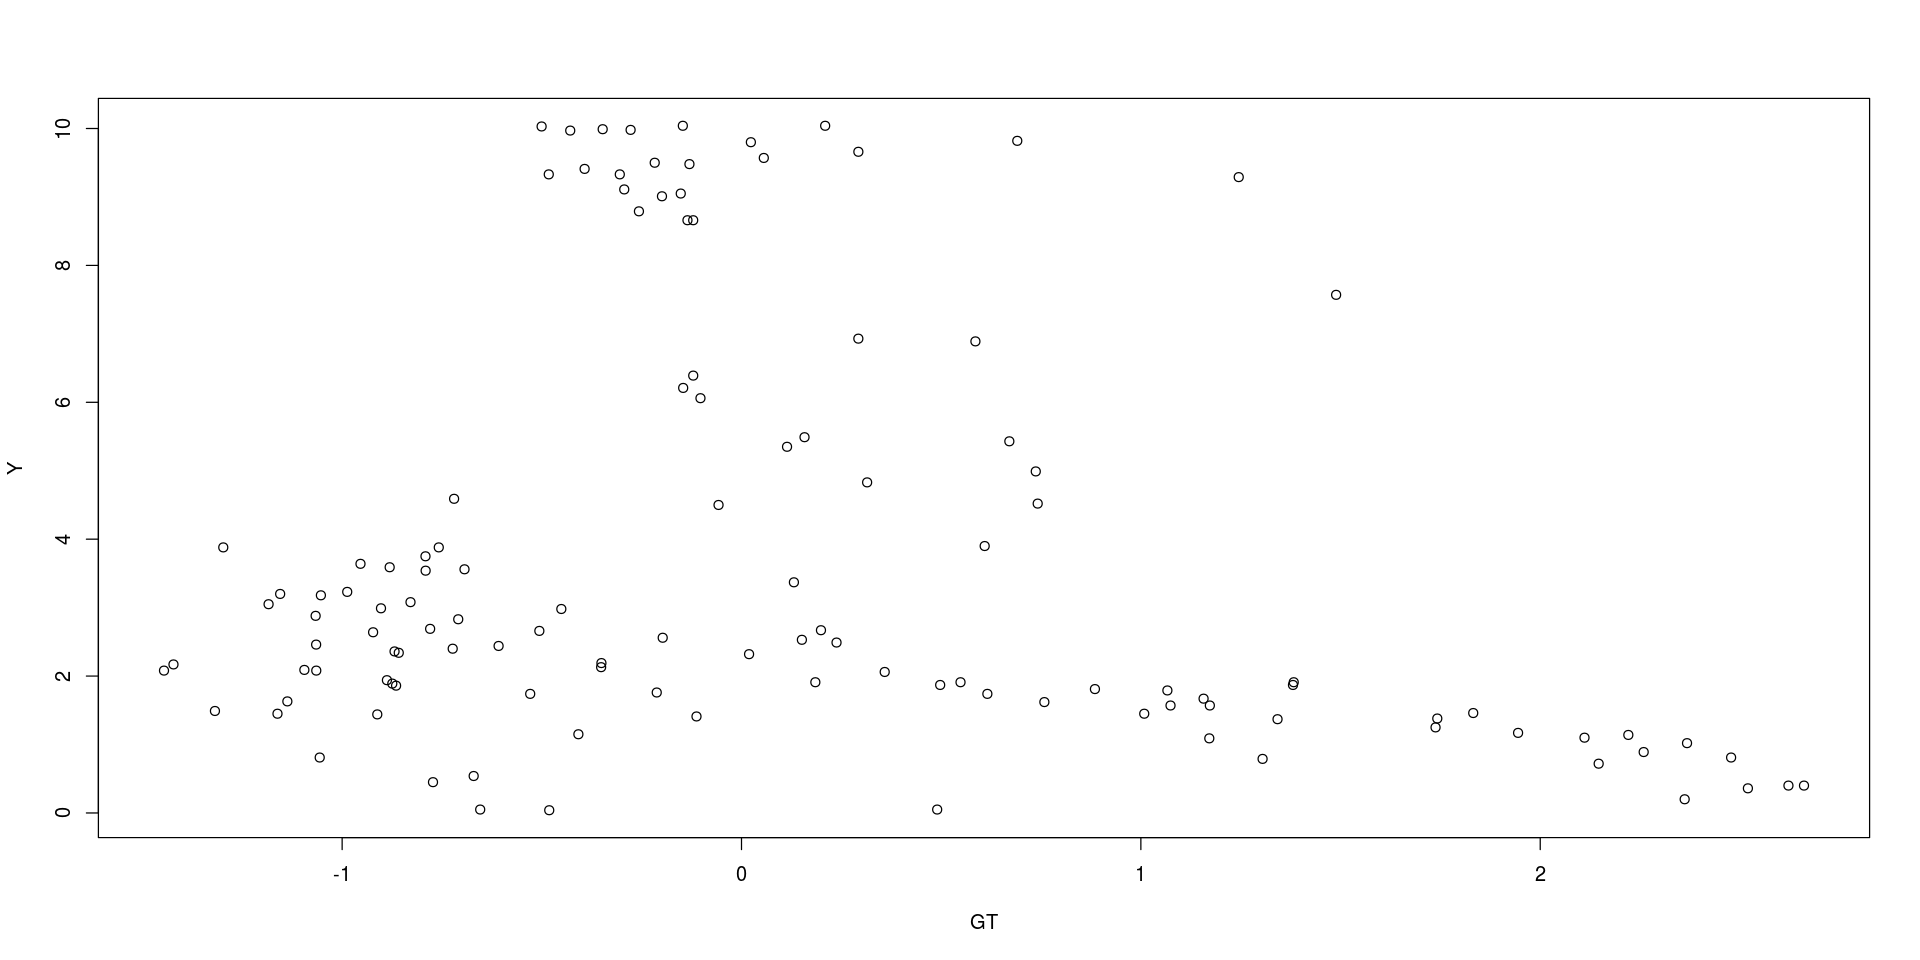

In [26]:
with(data = data_week, plot(Y ~ GT))

In [27]:
data_month$GT <- (data_month$T - data_all[subset_month-1, ]$T)/data_month$T
for (i in 2:24) {
   data_month$GT <- data_month$GT + (data_month$T - data_all[subset_month-i, ]$T)/data_month$T}

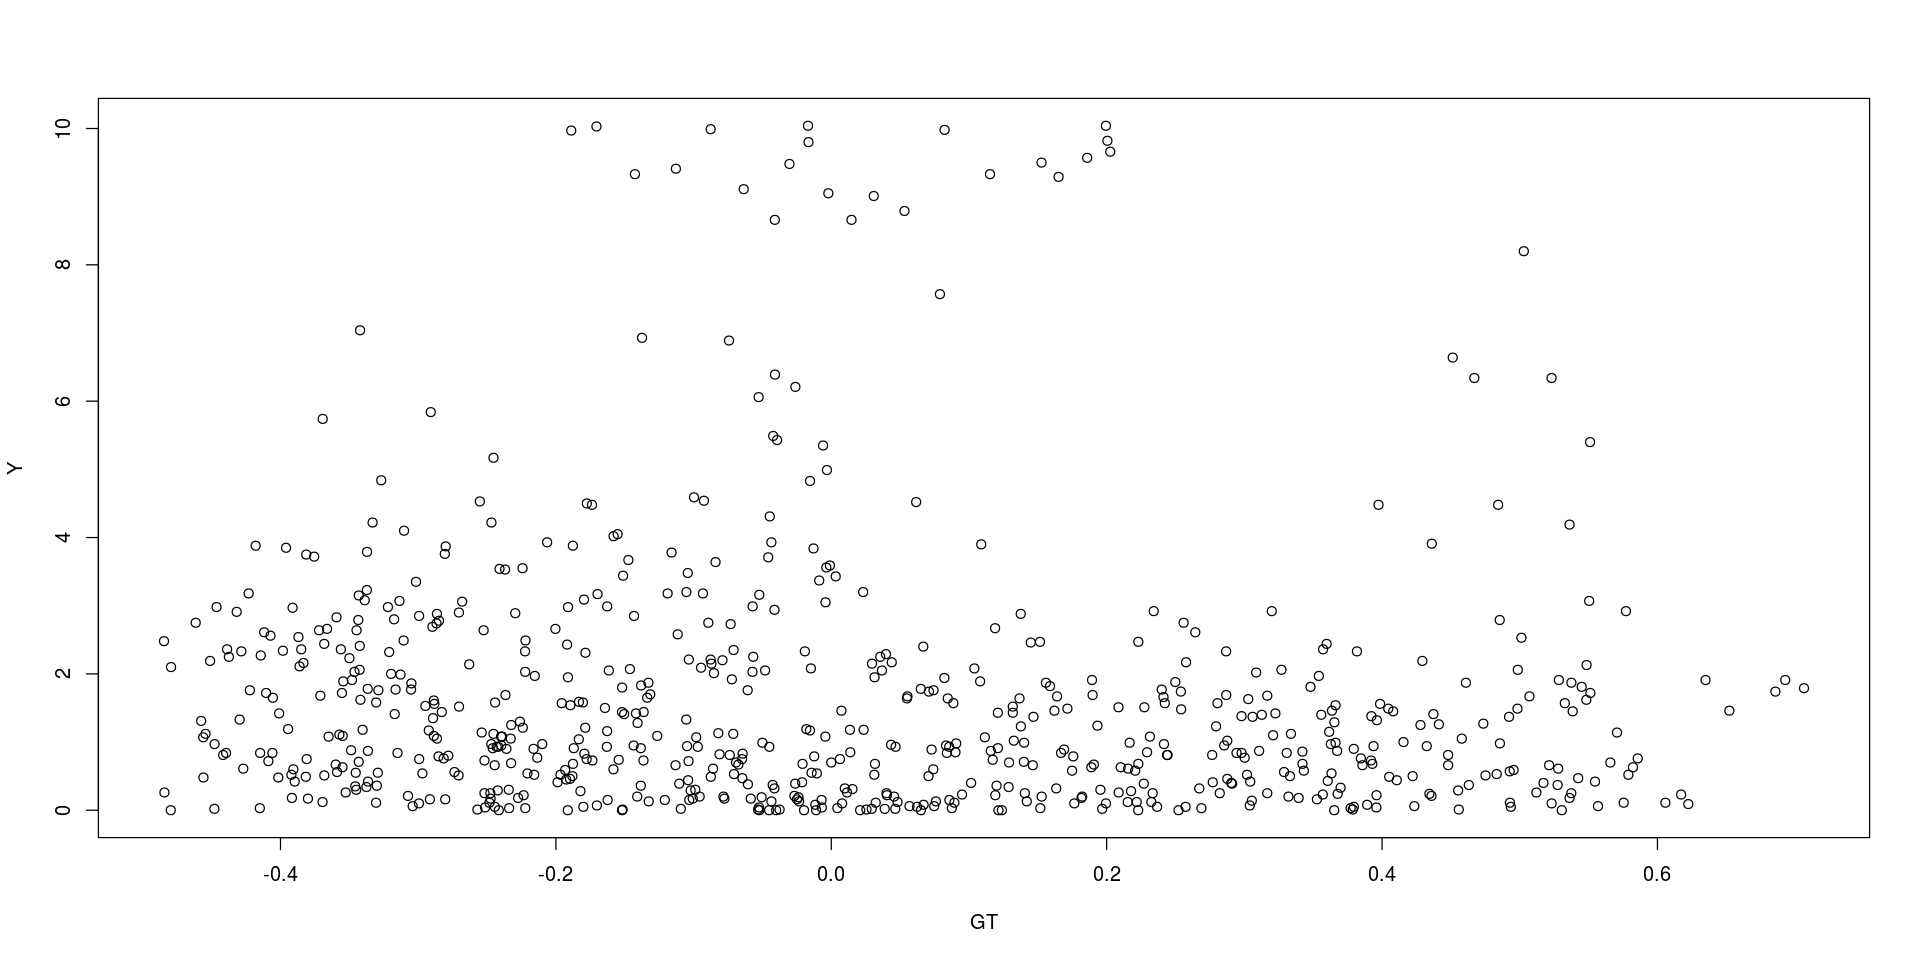

In [28]:
with(data = data_month, plot(Y ~ GT))

In [29]:
m5 <-lm(Yt~F-1+(T<=285)+atan(V/U), data = data_month)
summary(m5)


Call:
lm(formula = Yt ~ F - 1 + (T <= 285) + atan(V/U), data = data_month)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37377 -0.24402  0.00045  0.27530  1.13688 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
F             0.161652   0.005337  30.290  < 2e-16 ***
T <= 285FALSE 0.024108   0.036402   0.662 0.508016    
T <= 285TRUE  0.161655   0.058026   2.786 0.005479 ** 
atan(V/U)     0.050872   0.015208   3.345 0.000866 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4005 on 716 degrees of freedom
  (23 observations deleted due to missingness)
Multiple R-squared:  0.909,	Adjusted R-squared:  0.9085 
F-statistic:  1789 on 4 and 716 DF,  p-value: < 2.2e-16


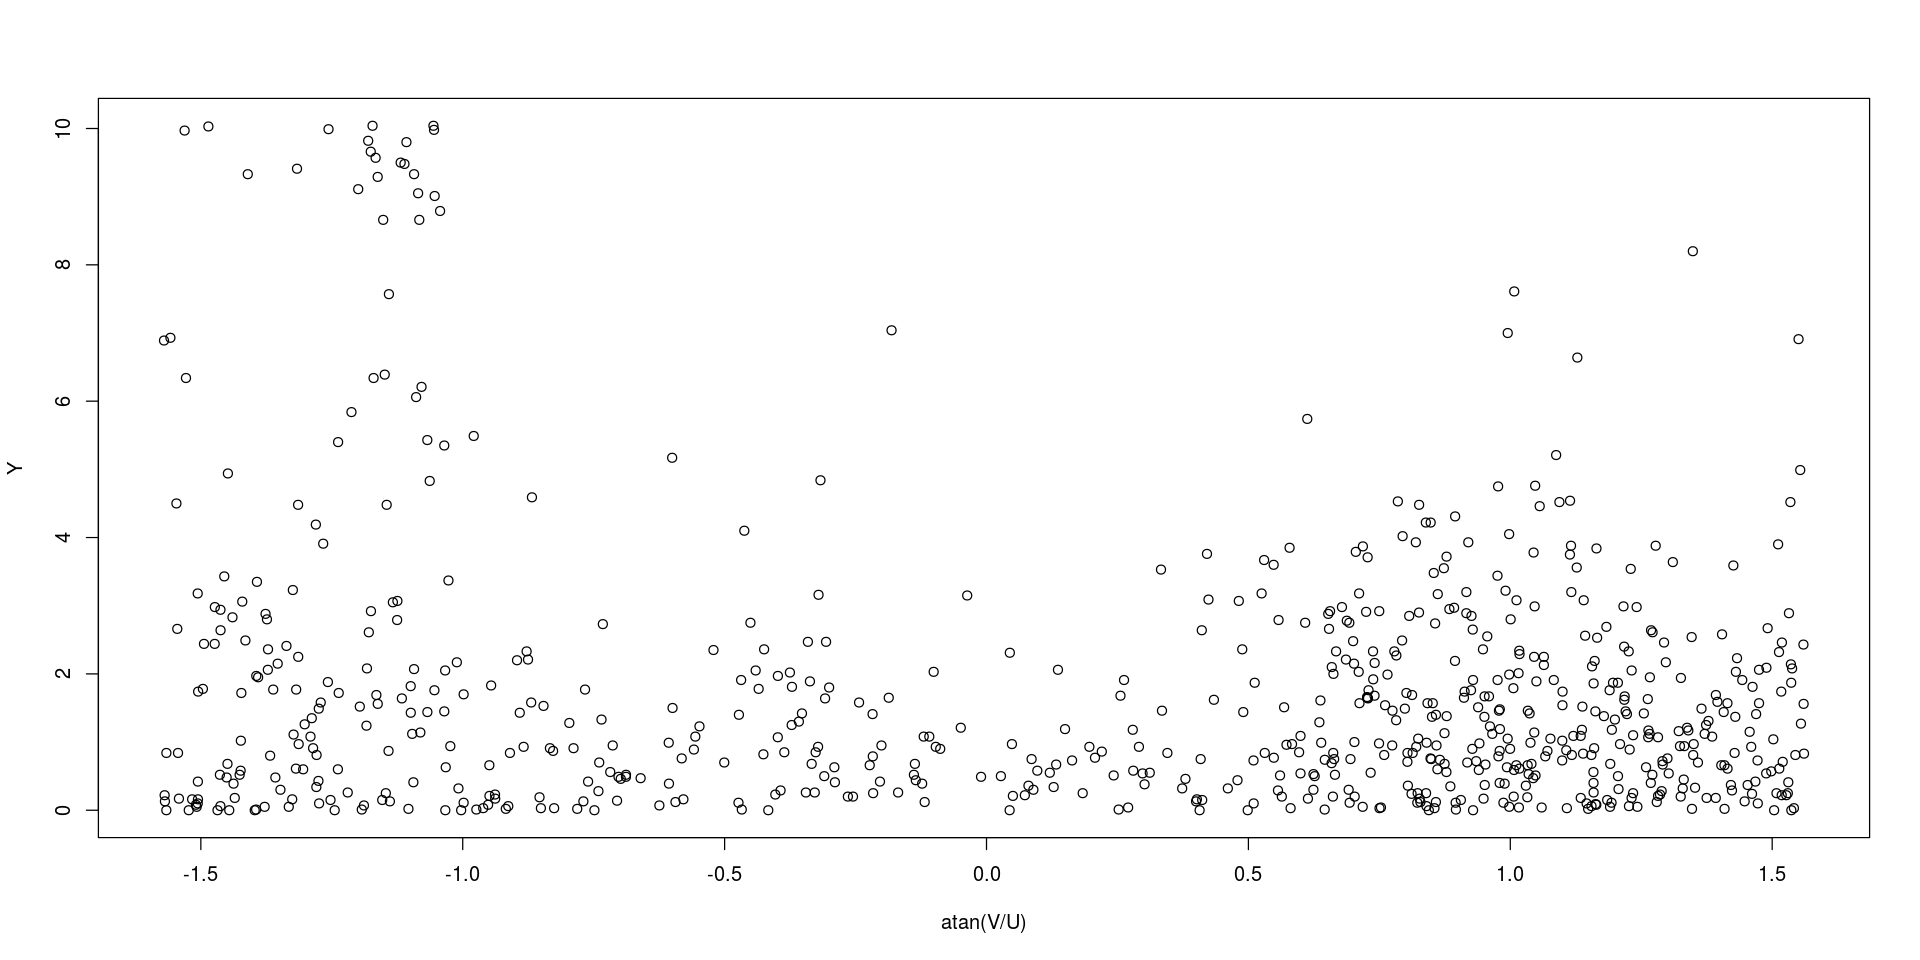

In [59]:
plot(Y~atan(V/U), data = data_month)

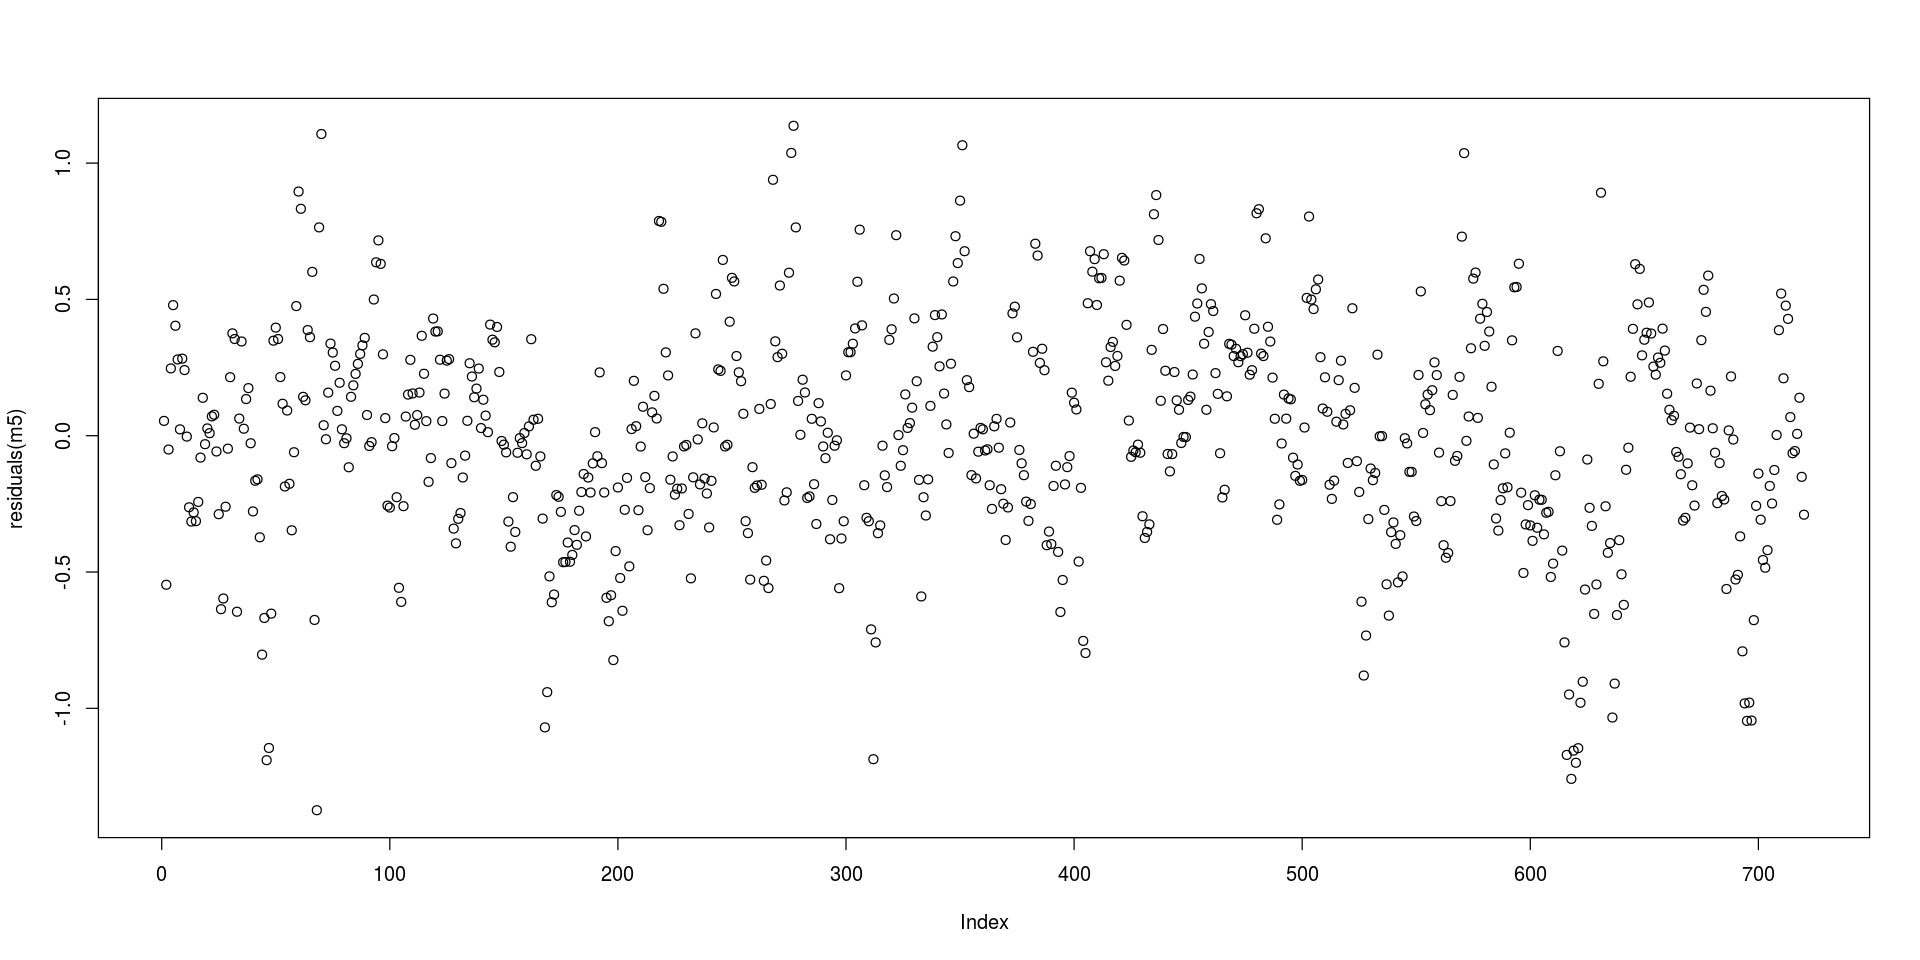

 Named num [1:720] 2.14 2.38 2.36 2.25 2.05 ...
 - attr(*, "names")= chr [1:720] "6192" "6193" "6194" "6195" ...
NULL


ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


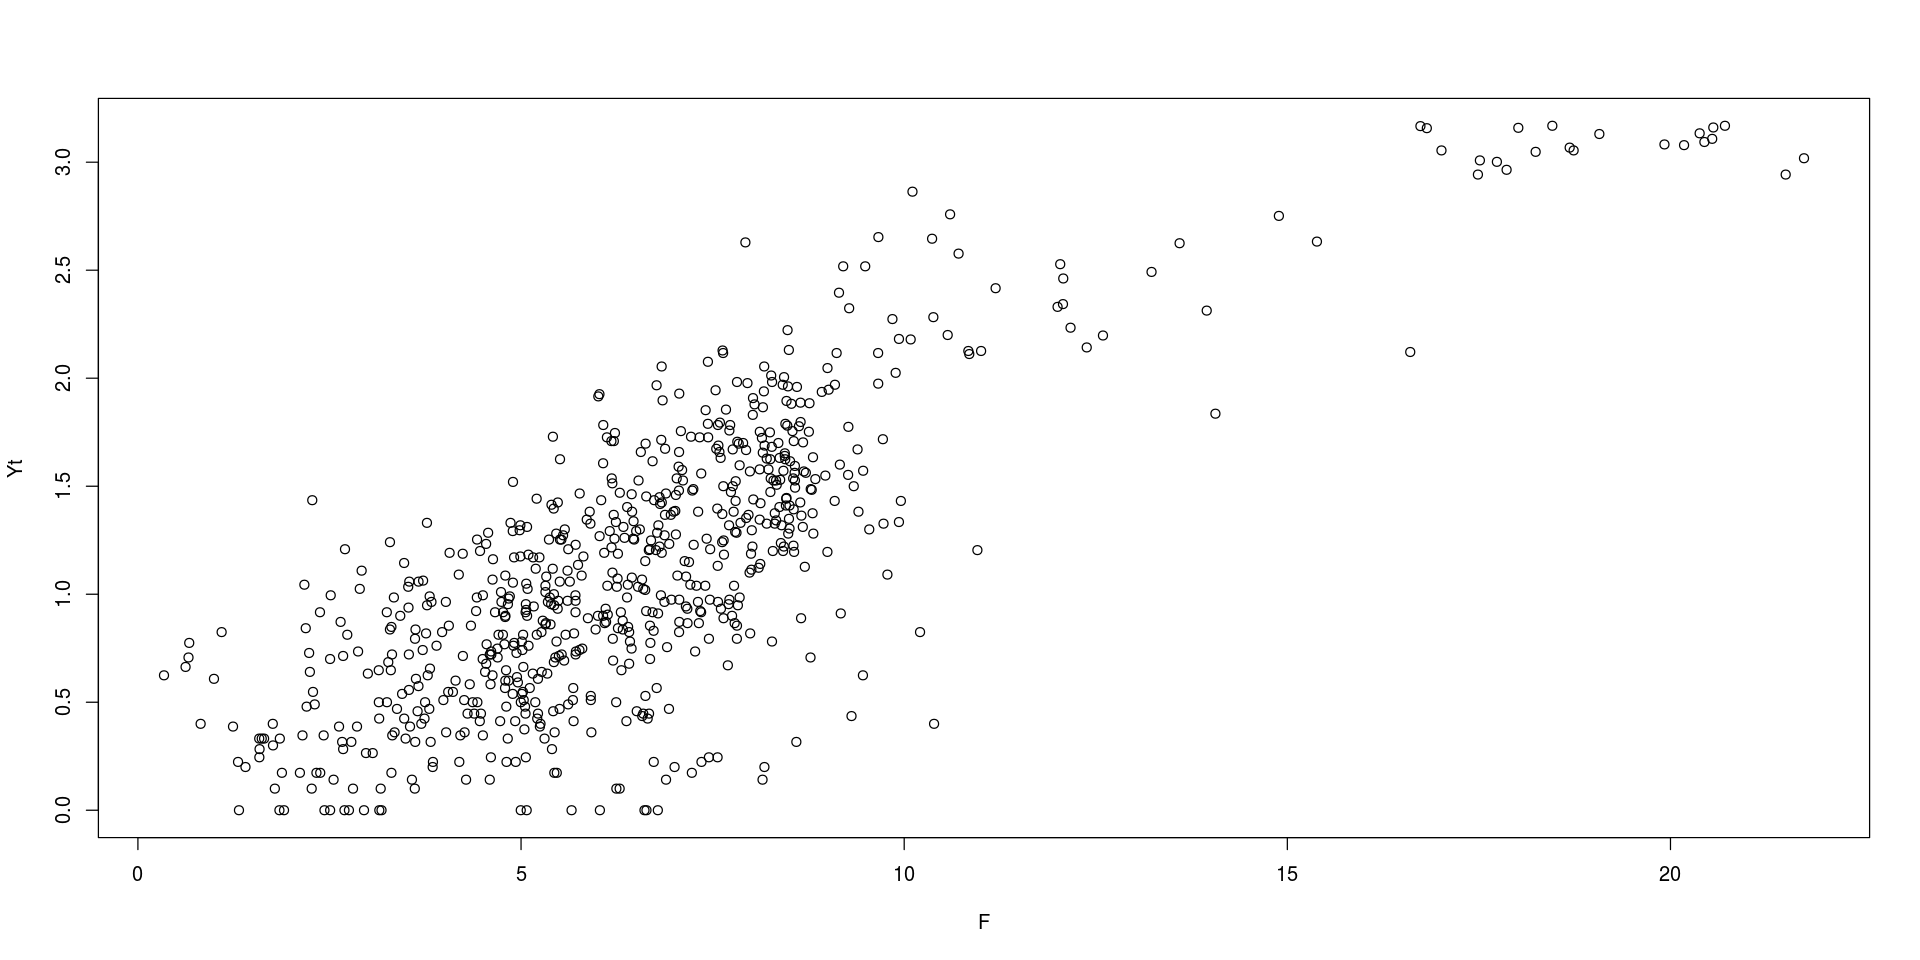

In [31]:
plot(residuals(m5))
plot(Yt ~ F, data = data_month)
P = predict(m5)
print(str(P))
P = pmin(P,3) #seuil à tester
points(data_month$F, P, col='blue')

In [ ]:
sum(is.na(data_month$T))
str(data_month)

## Utilisation Couverture nuageuse

In [32]:
data_N = data.frame(Y = Y_train$Production, N=X_train[ ,96])
index = which(is.na(data_N$N))
data_N <- data_N[-index,]
#data_N$NN <- (data_N$N)^2
subset_week <- 6192:6359
data_week <- data_N[subset_week, ]
#data_week$GT <- (data_week$T - data_all[subset_week-6, ]$T)/data_week$T
subset_month <- 6192:6934
data_month <- data_N[subset_month, ]

In [33]:
index

[1]     1     2     3     4     5     6     7     8     9    10    11    12
 [13]    13    14    15    16    17    18    19    20    21    22    23   360
 [25]   361   362   363   364   365   366   367   368   369   370   371   372
 [37]   373   374   375   376   377   378   379   380   381   382   383  6240
 [49]  6241  6242  6243  6244  6245  6246  6247  6248  6249  6250  6251  6252
 [61]  6253  6254  6255  6256  6257  6258  6259  6260  6261  6262  6599  6600
 [73]  6601  6602  6603  6604  6605  6606  6607  6608  6609  6610  6611  6612
 [85]  6613  6614  6615  6616  6617  6618  6619  6620  6621  6622 12479 12480
 [97] 12481 12482 12483 12484 12485 12486 12487 12488 12489 12490 12491 12492
[109] 12493 12494 12495 12496 12497 12498 12499 12500 12501 12838 12839 12840
[121] 12841 12842 12843 12844 12845 12846 12847 12848 12849 12850 12851 12852
[133] 12853 12854 12855 12856 12857 12858 12859 12860 12861 18718 18719 18720
[145] 18721 18722 18723 18724 18725 18726 18727 18728 18729 18730 18731 18732
[157] 18733 18734 18735 18736 18737 18738 18739 18740 19077 19078 19079 19080
[169] 19081 19082 19083 19084 19085 19086 19087 19088 19089 19090 19091 19092
[181] 19093 19094 19095 19096 19097 19098 19099 19100 24957 24958 24959 24960
[193] 24961 24962 24963 24964 24965 24966 24967 24968 24969 24970 24971 24972
[205] 24973 24974 24975 24976 24977 24978 24979 25316 25317 25318 25319 25320
[217] 25321 25322 25323 25324 25325 25326 25327 25328 25329 25330 25331 25332
[229] 25333 25334 25335 25336 25337 25338 25339 31137 31138 31139 31140 31141
[241] 31142 31143 31144 31145 31146 31147 31148 31149 31150 31151 31152 31153
[253] 31154 31155 31156 31157 31158 31159 31496 31497 31498 31499 31500 31501
[265] 31502 31503 31504 31505 31506 31507 31508 31509 31510 31511 31512 31513
[277] 31514 31515 31516 31517 31518 31519

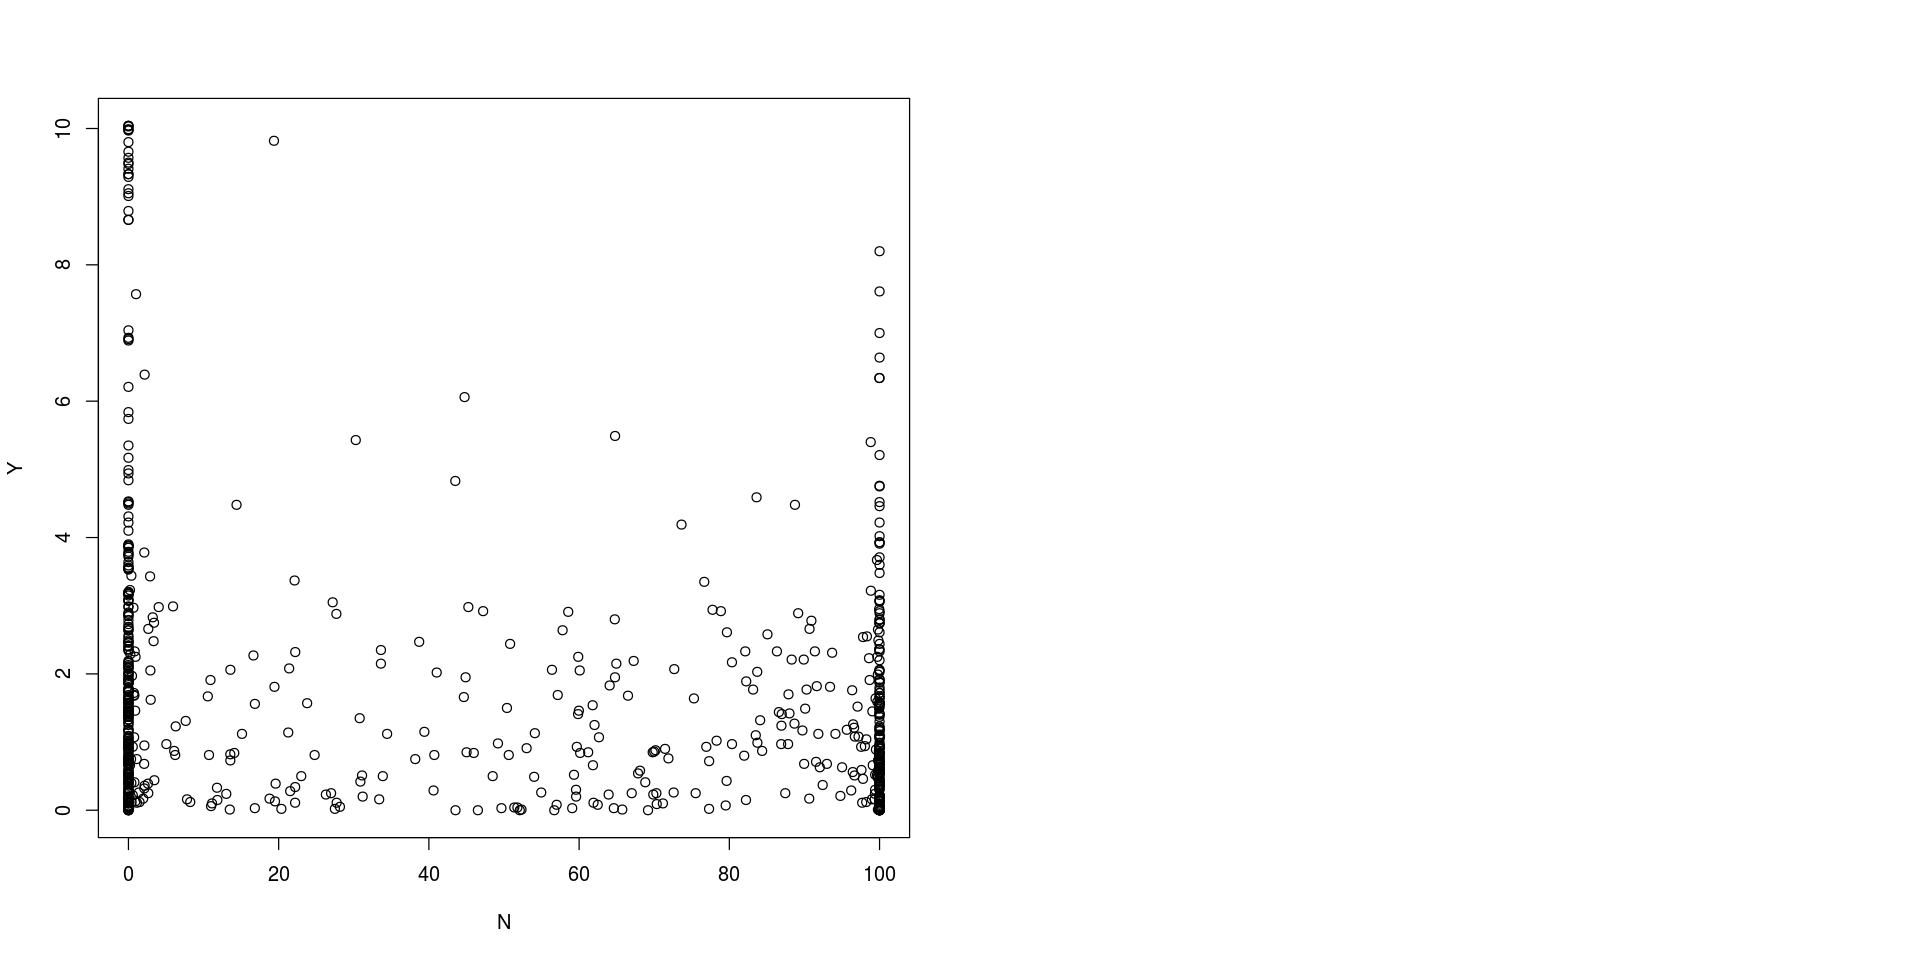

In [33]:
options(repr.plot.width=16, repr.plot.height=8)
par(mfrow=c(1,2))
with(data = data_month, plot(Y ~ N))
#with(data = data_month, plot(Y ~ NN))

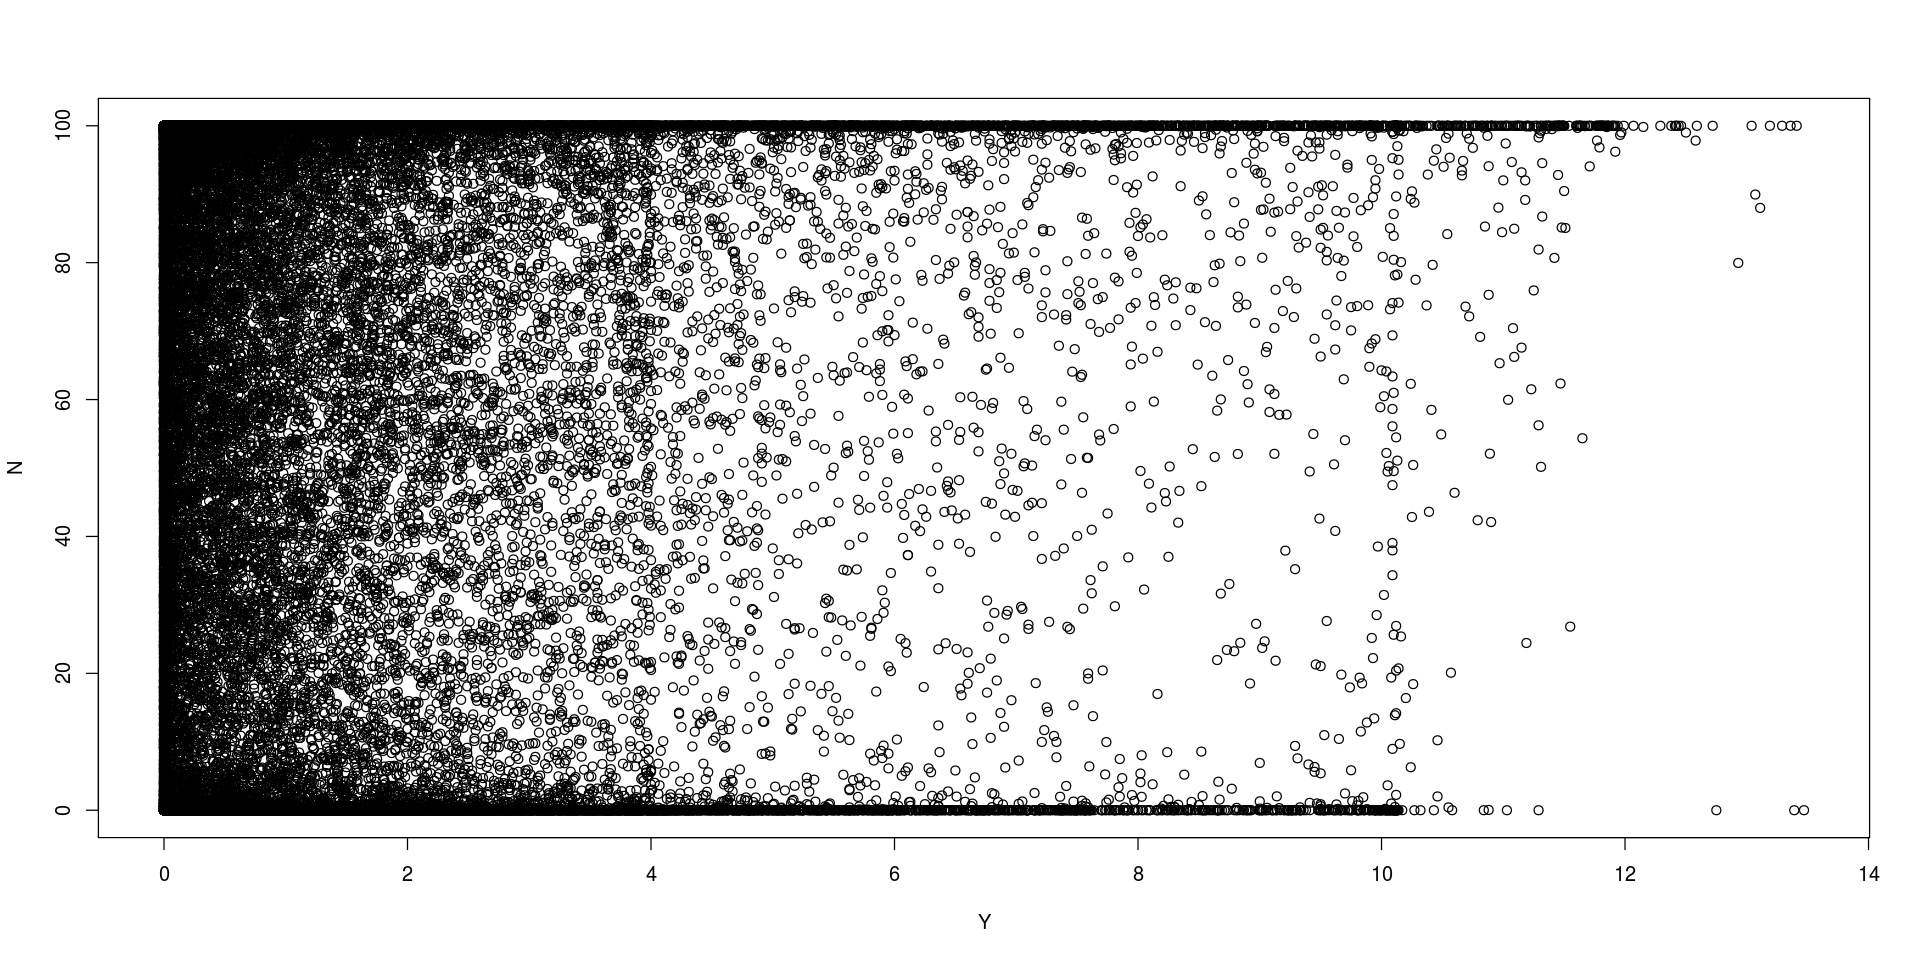

In [34]:
plot(data_N)

Pas d'information dans la couverture nuageuse à priori

In [30]:
str(data_N)

 num [1:37375, 1:2] 0.02 0.07 0.22 0.39 0.41 0.25 0.11 0.22 0.13 0.2 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "Y" ""
 - attr(*, "names")= chr [1:74750] "Y" "N" NA NA ...


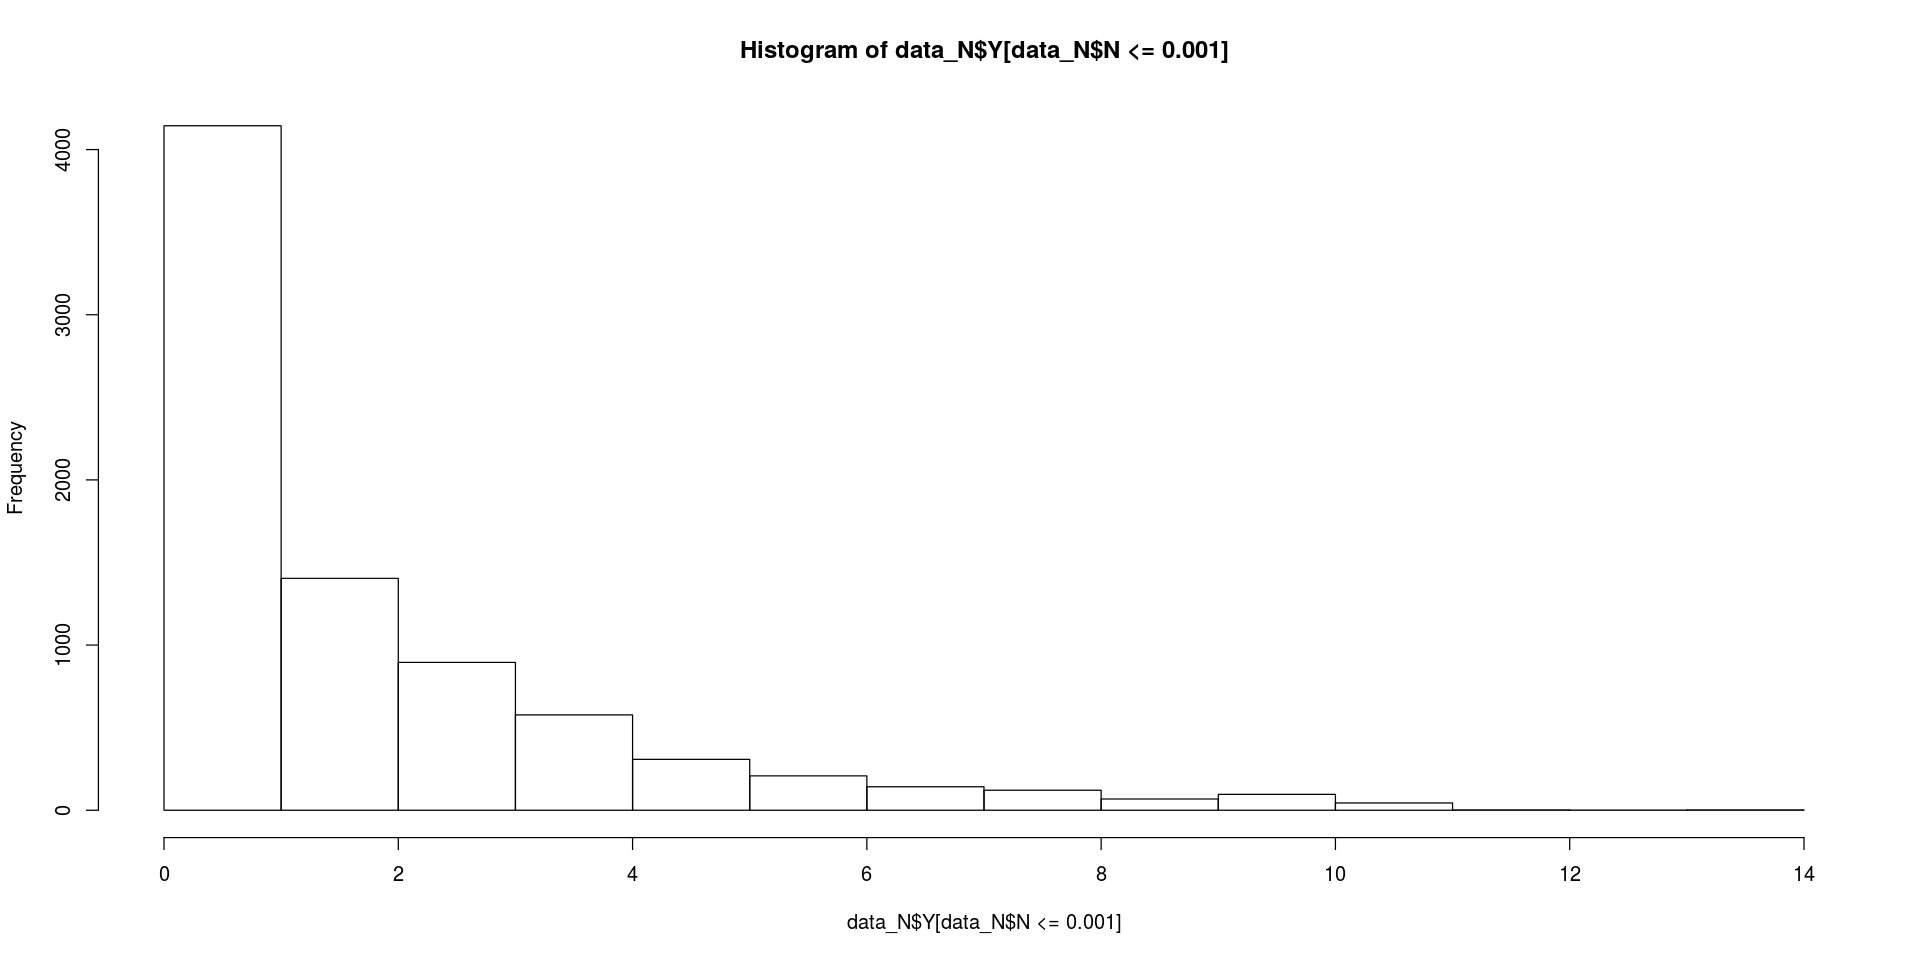

In [43]:
hist(data_N$Y[data_N$N<=1e-3])

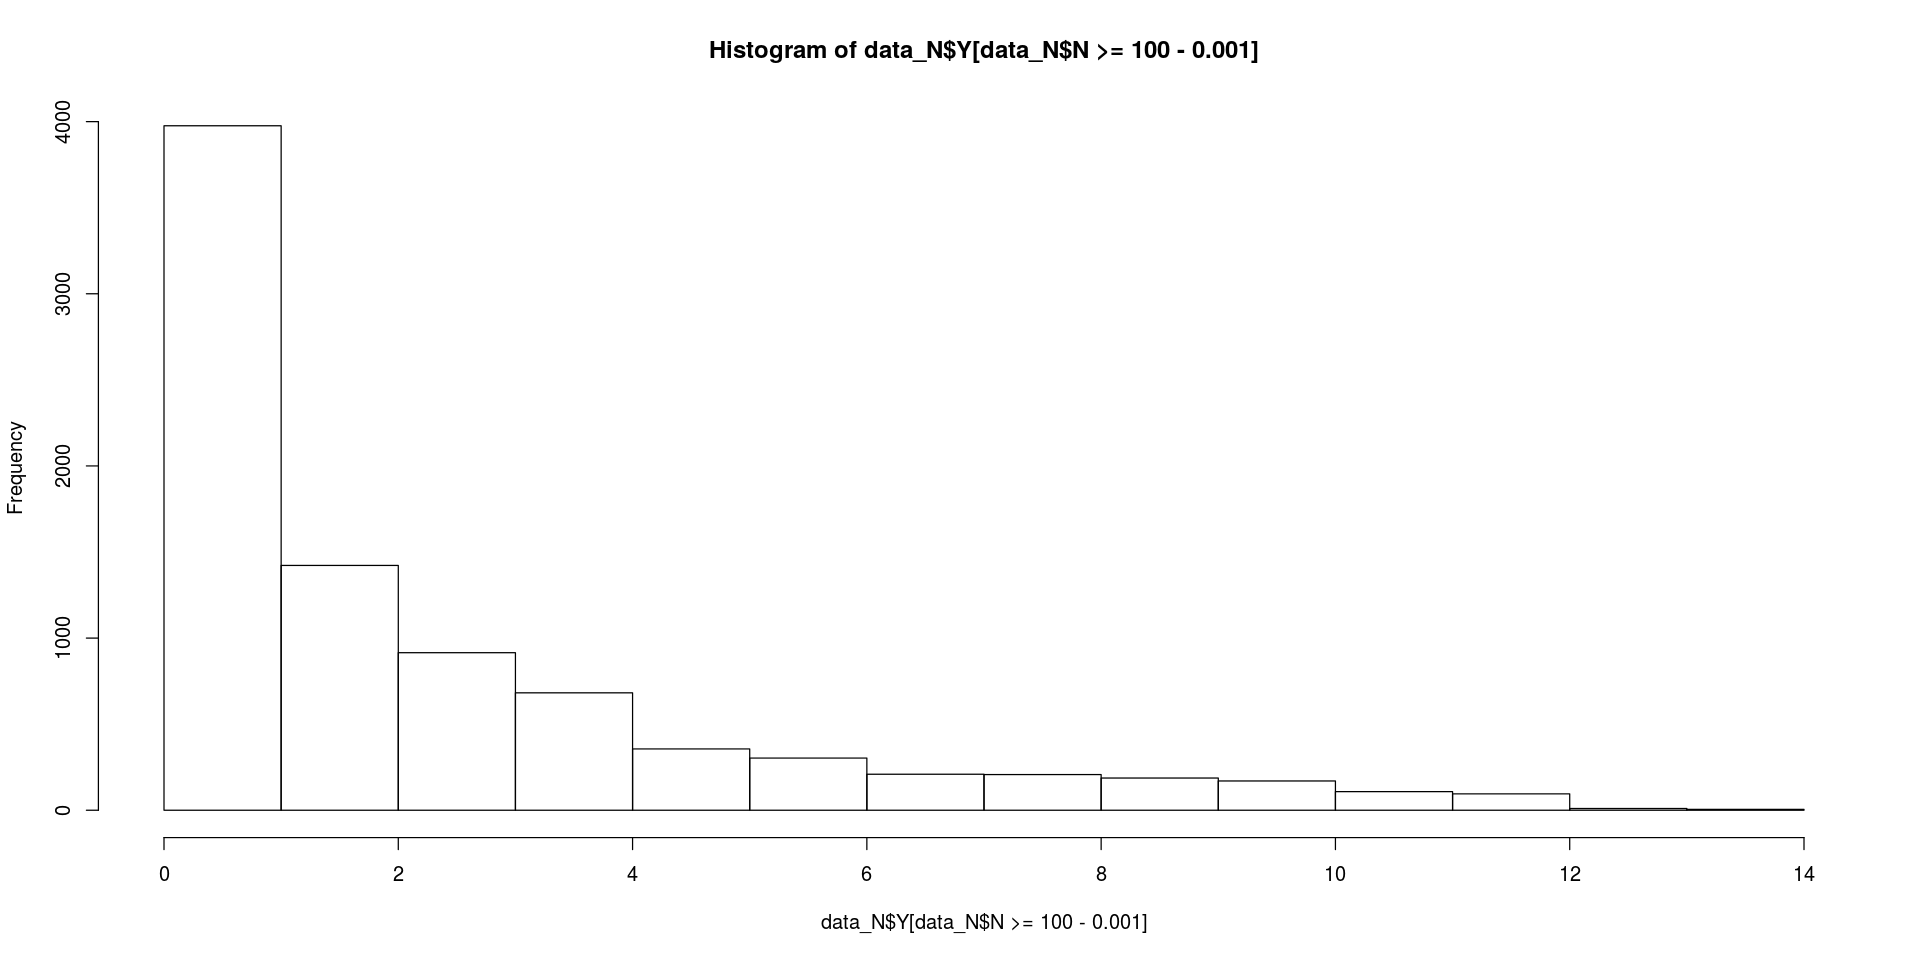

In [44]:
hist(data_N$Y[data_N$N>=100-1e-3])